# Forecasting Drought Severity in U.S. Counties Using ML on Historical Weather Data (2011–2020)

<big>SUMA TATA</big>

---
---

### **I. Introduction**


Background

Drought is one of the most complex and devastating natural hazards, impacting millions of people globally through its effects on agriculture, water supply, energy production, and ecosystems. Unlike abrupt disasters such as floods or earthquakes, droughts evolve slowly and can persist for months or even years, making early detection and prediction a critical necessity (Wilhite & Glantz, 1985).

Reference:
Wilhite, D. A., & Glantz, M. H. (1985). Understanding the drought phenomenon: The role of definitions. Water International, 10(3), 111–120. https://doi.org/10.1080/02508068508686328

The U.S. Drought Monitor (USDM), a collaborative initiative by the National Drought Mitigation Center (NDMC), the United States Department of Agriculture (USDA), and the National Oceanic and Atmospheric Administration (NOAA), provides a comprehensive weekly map of drought conditions across the United States. It classifies droughts into five categories—D0 (Abnormally Dry) through D4 (Exceptional Drought)—based on a blend of quantitative data (e.g., precipitation, soil moisture) and qualitative reports from experts and local observers (USDM, 2024). While this method has been effective, it remains heavily reliant on manual analysis and subjective inputs, introducing the need for scalable, automated solutions.
https://droughtmonitor.unl.edu/About/WhatistheUSDM.aspx
https://www.drought.gov/data-maps-tools/us-drought-monitor


Recent advances in data science and the growing accessibility of large-scale meteorological datasets have opened new possibilities for machine learning (ML)-based drought prediction. ML algorithms can process vast amounts of temporal and spatial data, uncover hidden patterns, and make data-driven forecasts that traditional statistical models might overlook. This makes them particularly suited for environmental forecasting problems, such as drought prediction.

Meteorological variables such as temperature, precipitation, humidity, wind speed, and pressure are critical indicators of atmospheric changes that lead to drought. For example, prolonged high temperatures can increase evaporation rates, while reduced precipitation leads to a decline in soil moisture and water reserves. By feeding historical meteorological data into machine learning models, it is possible to develop systems that predict drought severity levels before they fully materialize, thereby allowing governments and communities to take preventive measures.

This project focuses specifically on using meteorological data to determine whether atmospheric conditions alone are sufficient to predict drought intensity. This has the potential not only to reduce reliance on manual monitoring but also to make drought forecasting accessible in regions where comprehensive environmental datasets are unavailable.

By combining meteorological indicators with machine learning models, this study contributes to the growing body of work in environmental intelligence, and presents a practical, scalable approach to drought forecasting that can aid in early warning systems, water resource management, and agricultural planning.

⸻

Problem Statement

The objective of this project is to predict drought intensity using meteorological data. The target variable is the drought severity score provided by the U.S. Drought Monitor, and the predictors include atmospheric indicators such as temperature, humidity, wind speed, precipitation, and pressure.

By applying machine learning techniques to historical meteorological data, the study aims to assess whether these variables alone can accurately classify drought severity levels. The results will determine the feasibility of automating drought classification, supporting the development of early warning systems that could be applied beyond the United States in regions with limited hydrological or soil data.

---

### **II. Data Description**

This project uses two primary datasets to predict drought intensity based on meteorological conditions: one from the U.S. Drought Monitor (USDM) and the other from Kaggle’s Meteorological Drought Dataset.

1. U.S. Drought Monitor Data
	•	Owner: National Drought Mitigation Center (NDMC), USDA, and NOAA
	•	Link: https://droughtmonitor.unl.edu/DmData/GISData.aspx

The USDM provides weekly drought severity classifications across the U.S., ranging from “None” to “D4 (Exceptional Drought).” To collect this data, a Python script was written to loop through weekly intervals starting from a given date. Using the datetime and pandas libraries, the script constructs a list of weekly dates, generates request URLs for each, and downloads the corresponding CSV data. All files are then merged into a single dataset using pd.concat() and saved locally.

2. Meteorological Dataset (Kaggle)
	•	Owner: Kaggle community contributor (cdminix)
	•	Link: https://www.kaggle.com/datasets/cdminix/us-drought-meteorological-data

This dataset provides daily meteorological indicators (e.g., temperature, wind speed, humidity, pressure, precipitation) recorded across U.S. counties. Due to the large file size, the dataset was processed in chunks using pandas.read_csv() with chunksize=100000. Years 2000–2010 were filtered out to focus on the 2011–2020 training period. Null entries in the target variable score were also removed before saving the cleaned dataset. The training, validation, and test datasets were later combined and stored in a final CSV.

- Time range and/or spatial range that the data covers.

The meteorological data spans the years 2011–2020 across U.S. counties, providing high-resolution temporal and spatial coverage. The drought data is also weekly and county-level, obtained from the same period, ensuring consistency between the datasets. For geospatial visualizations, the time periods are specifically matched to the drought severity records from USDM.

- Data dictionary matching field/column names to understandable text

Drought Severity Levels (USDM Categories)

The U.S. Drought Monitor (USDM) classifies drought conditions into different severity levels:

Category	Description	Explanation
None	- No Drought	Normal conditions with no dryness concerns.
D0 -	Abnormally Dry	Early-stage dryness that can slow crop growth but is not yet a drought.
D1 -	Moderate Drought	Some damage to crops/pastures, water shortages possible.
D2 -	Severe Drought	Likely crop losses, common water shortages, and water restrictions.
D3 -	Extreme Drought	Major crop/pasture losses, widespread water shortages.
D4 -	Exceptional Drought	Unprecedented drought conditions with severe economic and ecological impacts.

These classifications help monitor drought intensity and are used as the target variable in your machine learning model.

⸻

FIPS Code (Federal Information Processing Standards)
	•	Definition: A FIPS code is a unique 5-digit identifier assigned to U.S. counties.
	•	Example:
	•	01001 → Autauga County, Alabama
	•	06037 → Los Angeles County, California
	•	Used in datasets to identify geographic locations.

⸻

Meteorological Data Indicators

The meteorological dataset includes key weather variables used as predictors in your project:

WS10M_MIN	- Minimum Wind Speed at 10 Meters (m/s)
QV2M -	Specific Humidity at 2 Meters (g/kg)
T2M_RANGE	- Temperature Range at 2 Meters (°C)
WS10M	- Wind Speed at 10 Meters (m/s)
T2M	- Temperature at 2 Meters (°C)
WS50M_MIN	- Minimum Wind Speed at 50 Meters (m/s)
T2M_MAX	- Maximum Temperature at 2 Meters (°C)
WS50M	- Wind Speed at 50 Meters (m/s)
TS	- Earth Skin Temperature (°C)
WS50M_RANGE	- Wind Speed Range at 50 Meters (m/s)
WS50M_MAX	- Maximum Wind Speed at 50 Meters (m/s)
WS10M_MAX -	Maximum Wind Speed at 10 Meters (m/s)
WS10M_RANGE	- Wind Speed Range at 10 Meters (m/s)
PS -	Surface Pressure (kPa)
T2MDEW	- Dew/Frost Point at 2 Meters (°C)
T2M_MIN	- Minimum Temperature at 2 Meters (°C)
T2MWET -	Wet Bulb Temperature at 2 Meters (°C)
PRECTOT	- Precipitation (mm/day)

These meteorological indicators help predict drought intensity by capturing weather variations over time.

- How the data relates to the Problem Statement


This project aims to predict drought intensity using meteorological data, improving early detection through machine learning.

1. U.S. Drought Monitor (USDM) – Target Variable
	•	Provides drought severity labels (None to D4), serving as the dependent variable (Y) for model training.
	•	Enables the model to learn patterns between meteorological conditions and drought intensity.

2. Meteorological Data – Predictors (Features)
	•	Includes temperature, humidity, wind speed, pressure, and precipitation, key indicators influencing drought formation.
	•	Used as independent variables (X) to predict future drought conditions.

3. Time & Spatial Coverage
	•	Aligned 2011-2020 meteorological and drought data for accurate training.
	•	County-level (FIPS-based) structure ensures consistency when merging datasets.

Impact

By analyzing past weather patterns, the model can:
Automate drought classification
Enhance early warning systems
Support proactive water & agricultural planning

Thus, the data directly addresses the problem of predicting drought intensity using meteorological data alone for scalable drought forecasting.


Validation Dataset (2021–2025)
	•	Region: California counties (58 FIPS codes)
	•	Drought Data: Extracted from U.S. Drought Monitor for 2021–2025
	•	Weather Data: Pulled using the NASA POWER API for the same FIPS and date range. https://power.larc.nasa.gov/data-access-viewer/
	•	Reason: Full U.S. API extraction is time-intensive, so California was used for validation
	•	Use Case: To test the model’s performance on recent, unseen data

---

### **III. Summary Statistics and Visualizations**

In [ ]:
import datetime
import pandas as pd
import geopandas as gpd
import requests
import time
import datetime
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed
from datetime import datetime
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I generated weekly dates (2011-2020), built corresponding USDM data URLs, fetched and merged 522 weekly drought datasets into a single DataFrame.

This Code is how I extracted 2011-2020 Drought Data, I commented because I saved it in Drive

In [ ]:
# # -- Define the start date for data collection (Assuming data is available every 7 days)
# date0 = datetime.datetime(2011, 1, 4)  # Start from January 4, 2011
# dt = datetime.timedelta(days=7)  # Set interval to 7 days
# dates = []  # List to store generated dates

# # -- Generate a list of dates spaced 7 days apart for 522 weeks (~10 years)
# for ii in range(522):
#     dates.append(date0 + ii * dt)

# # -- Construct file URLs based on generated dates
# fname_base = "https://droughtmonitor.unl.edu/DmData/GISData.aspx?mode=table&aoi=county&date="
# fnames = []  # List to store generated file URLs

# for ii in range(522):
#     fnames.append(fname_base + dates[ii].strftime("%Y-%m-%d"))  # Append date to base URL

# # -- Read the files from generated URLs and store data in a list
# data = []  # List to store DataFrame chunks

# for ii in range(522):
#     print("Reading file for {0}...".format(dates[ii]))  # Display progress
#     data.append(pd.read_csv(fnames[ii]))  # Read and store CSV data

# # -- Concatenate all data frames into a single DataFrame and reset index
# data = pd.concat(data).reset_index(drop=True)

In [ ]:
# # Save the merged data as a CSV file
# data.to_csv("/content/drive/MyDrive/MLPPproj/drought_data.csv", index=False, encoding="utf-8")

# print("✅ Data successfully saved as 'drought_data.csv'")

In [ ]:
drought_data = pd.read_csv("/content/drive/MyDrive/MLPPproj/drought_data.csv")

In [ ]:
drought_data

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20110104,2013,Aleutians East Borough,AK,4.11,95.89,0.0,0.00,0.00,0.0,2011-01-04,2011-01-10,1
1,20110104,2016,Aleutians West Census Area,AK,100.00,0.00,0.0,0.00,0.00,0.0,2011-01-04,2011-01-10,1
2,20110104,2020,Anchorage Municipality,AK,0.00,100.00,0.0,0.00,0.00,0.0,2011-01-04,2011-01-10,1
3,20110104,2050,Bethel Census Area,AK,99.57,0.43,0.0,0.00,0.00,0.0,2011-01-04,2011-01-10,1
4,20110104,2060,Bristol Bay Borough,AK,0.00,100.00,0.0,0.00,0.00,0.0,2011-01-04,2011-01-10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681357,20201229,56037,Sweetwater County,WY,0.00,100.00,100.0,59.57,11.82,0.0,2020-12-29,2021-01-04,1
1681358,20201229,56039,Teton County,WY,86.70,13.30,0.0,0.00,0.00,0.0,2020-12-29,2021-01-04,1
1681359,20201229,56041,Uinta County,WY,0.00,100.00,100.0,35.80,0.00,0.0,2020-12-29,2021-01-04,1
1681360,20201229,56043,Washakie County,WY,0.00,100.00,100.0,85.71,66.10,0.0,2020-12-29,2021-01-04,1


This dataset will serve as the (target variable) for the project, mapping drought severity levels (None, D0–D4) to corresponding meteorological conditions.

In [ ]:
#Created a flexible function to automatically download and merge weekly U.S. drought data from a given start date over a custom time range, and save it as a single CSV file for further analysis.

def fetch_drought_data(start_date: str, years: int = 0, months: int = 0, days: int = 0, output_file: str = "drought_data.csv"):
    """
    Fetches drought data for a given time range (years, months, or days) from a start date
    and saves it as a CSV with 7-day intervals.

    Parameters:
    - start_date (str): Start date in "YYYY-MM-DD" format.
    - years (int, optional): Number of years to fetch.
    - months (int, optional): Number of months to fetch.
    - days (int, optional): Number of days to fetch.
    - output_file (str): Name of the output CSV file.

    Returns:
    - Saves the concatenated data as a CSV file.
    """

    # Convert start date to datetime format
    date0 = datetime.datetime.strptime(start_date, "%Y-%m-%d")

    # Convert total time into weeks
    total_days = (years * 365) + (months * 30) + days  # Approximate conversion
    num_weeks = total_days // 7  # Convert days to weeks (7-day intervals)

    if num_weeks == 0:
        print("⚠ Please provide a valid time period (years, months, or days).")
        return

    print(f"📅 Fetching data from {start_date} for {num_weeks} weeks (7-day intervals)")

    # Generate list of dates with 7-day intervals
    dt = datetime.timedelta(days=7)
    dates = [date0 + i * dt for i in range(num_weeks)]

    # Generate file URLs
    fname_base = "https://droughtmonitor.unl.edu/DmData/GISData.aspx?mode=table&aoi=county&date="
    fnames = [fname_base + date.strftime("%Y-%m-%d") for date in dates]

    # Read and merge data
    data = []
    for i, url in enumerate(fnames):
        print(f"📥 Reading file for {dates[i].strftime('%Y-%m-%d')}...")
        try:
            df = pd.read_csv(url)
            data.append(df)
        except Exception as e:
            print(f"❌ Failed to read data for {dates[i].strftime('%Y-%m-%d')}: {e}")

    # Concatenate all data
    if data:
        data = pd.concat(data).reset_index(drop=True)
        data.to_csv(output_file, index=False, encoding="utf-8")
        print(f"✅ Data successfully saved as '{output_file}'")
    else:
        print("⚠ No data was fetched. Please check the date range.")

In [ ]:
import datetime

In [ ]:
fetch_drought_data(start_date="2025-02-04", days=30, output_file="/content/drive/MyDrive/MLPPproj/projectfinal/drought_data_feb_2025.csv")

📅 Fetching data from 2025-02-04 for 4 weeks (7-day intervals)
📥 Reading file for 2025-02-04...
📥 Reading file for 2025-02-11...
📥 Reading file for 2025-02-18...
📥 Reading file for 2025-02-25...
✅ Data successfully saved as '/content/drive/MyDrive/MLPPproj/projectfinal/drought_data_feb_2025.csv'


In [ ]:
drought_data_feb_2025 = pd.read_csv("/content/drive/MyDrive/MLPPproj/projectfinal/drought_data_feb_2025.csv")

I fetched weekly U.S. drought data for 30 days starting from February 4, 2025, and saved it as drought_data_feb_2025.csv to geoplot the feb data

In [ ]:
# Load the U.S. county shapefile using GeoPandas
cnty = gpd.read_file("/content/drive/MyDrive/MLPPproj/tl_2024_us_county/tl_2024_us_county.shp")

# Convert GEOID to integer so it matches the FIPS codes in the drought data
cnty["GEOID"] = cnty["GEOID"].astype(int)

# --- Prepare and merge average drought data for February 2025 with county shapes ---

# Filter rows in the drought dataset where the date is in February (month "02")
sub = drought_data_feb_2025[drought_data_feb_2025["MapDate"].astype(str).str[4:6] == "02"]

# Group by FIPS and calculate the average drought intensity (D0–D4) for each county
# Then merge with county geometry data using GEOID and FIPS as keys
drought_cnty = cnty.merge(
    sub[["FIPS", "D0", "D1", "D2", "D3", "D4"]].groupby("FIPS").mean().reset_index(),
    left_on="GEOID",
    right_on="FIPS"
)

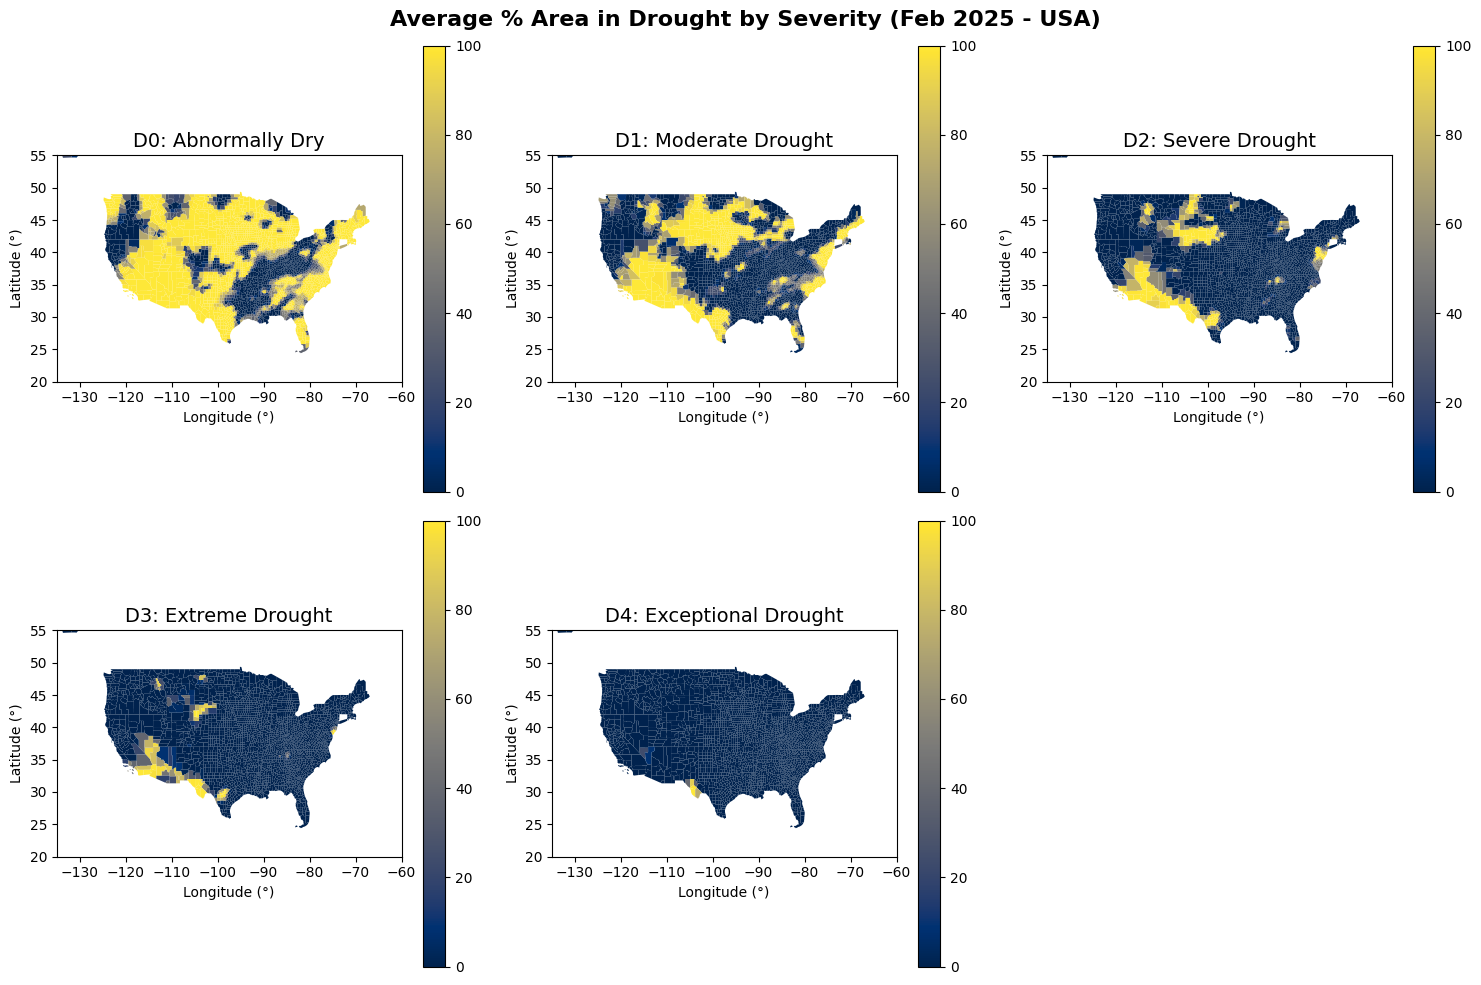

In [ ]:
# Define the drought categories and corresponding plot titles
drought_levels = ["D0", "D1", "D2", "D3", "D4"]
titles = [
    "D0: Abnormally Dry",
    "D1: Moderate Drought",
    "D2: Severe Drought",
    "D3: Extreme Drought",
    "D4: Exceptional Drought"
]

# Create a 3x2 grid of subplots to hold all five drought level maps
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array to simplify iteration
axes = axes.flatten()

# Plot each drought level map
for i, level in enumerate(drought_levels):
    # Plot the county-level average drought values for the given drought level
    ax = drought_cnty.plot(column=level, cmap="cividis", legend=True, ax=axes[i])

    # Set the title for each subplot
    ax.set_title(titles[i], fontsize=14)

    # Set axis labels with units
    ax.set_xlabel("Longitude (°)", fontsize=10)
    ax.set_ylabel("Latitude (°)", fontsize=10)

    # Set map limits to focus on the continental U.S.
    ax.set_xlim(-135, -60)
    ax.set_ylim(20, 55)

# Remove the empty 6th subplot (since only 5 plots are needed)
fig.delaxes(axes[-1])

# Set a super title for the entire figure
fig.suptitle("Average % Area in Drought by Severity (Feb 2025 - USA)", fontsize=16, fontweight="bold")

# Adjust layout to avoid overlapping elements
plt.tight_layout()
plt.show()

This figure presents five maps showing the average percentage of land area in each U.S. county affected by various levels of drought (D0 to D4) during February 2025, using recent data from the U.S. Drought Monitor. The severity increases from top-left to bottom-right, starting with abnormally dry (D0) areas and progressing to exceptional drought (D4). While these plots were previously shown individually, combining them into a single figure enables clearer visual comparison across drought categories. Lighter drought levels like D0 and D1 appear more widespread, whereas more intense droughts (D3 and D4) are concentrated in specific regions, especially in the western U.S. This snapshot of recent drought conditions helps establish a current-time reference point before analyzing historical patterns from the past.

In [ ]:
#I created a function that fetches weekly drought data for a given time period, merges it with U.S. county shapefiles, and visualizes average drought severity levels (D0–D4) as a multi-panel map.
def plot_drought_data(start_date: str, years: int = 0, months: int = 0, days: int = 0,
                      shapefile_path: str = "/content/drive/MyDrive/MLPPproj/tl_2024_us_county/tl_2024_us_county.shp"):
    """
    Fetches drought data from the USDM site for a given time range,
    merges it with U.S. county shapes, and plots the average severity
    for five drought categories (D0 to D4) in a multi-subplot layout.

    Parameters:
    - start_date (str): Start date in "YYYY-MM-DD" format.
    - years (int, optional): Number of years to fetch.
    - months (int, optional): Number of months to fetch.
    - days (int, optional): Number of days to fetch.
    - shapefile_path (str): Path to the U.S. county shapefile.

    Returns:
    - Displays 5 subplots for drought severity levels.
    """

    # --- Time setup ---
    # Convert start_date string to datetime object
    date0 = datetime.datetime.strptime(start_date, "%Y-%m-%d")

    # Calculate number of days and convert to number of weeks
    total_days = (years * 365) + (months * 30) + days  # Approximate conversion
    num_weeks = total_days // 7

    if num_weeks == 0:
        print("⚠ Please provide a valid time period (years, months, or days).")
        return

    print(f"📅 Fetching data from {start_date} for {num_weeks} weeks (7-day intervals)")

    # Create a list of weekly dates from start date
    dt = datetime.timedelta(days=7)
    dates = [date0 + i * dt for i in range(num_weeks)]

    # Generate URLs to download weekly drought data
    fname_base = "https://droughtmonitor.unl.edu/DmData/GISData.aspx?mode=table&aoi=county&date="
    fnames = [fname_base + date.strftime("%Y-%m-%d") for date in dates]

    # --- Data download ---
    data = []
    for i, url in enumerate(fnames):
        print(f"📥 Reading file for {dates[i].strftime('%Y-%m-%d')}...")
        try:
            df = pd.read_csv(url)
            data.append(df)
        except Exception as e:
            print(f"❌ Failed to read data for {dates[i].strftime('%Y-%m-%d')}: {e}")

    # Combine all fetched weekly data into a single DataFrame
    if data:
        drought_data = pd.concat(data).reset_index(drop=True)
    else:
        print("⚠ No data was fetched. Please check the date range.")
        return

    # --- Shapefile and merge ---
    # Load U.S. counties shapefile using GeoPandas
    cnty = gpd.read_file(shapefile_path)
    cnty["GEOID"] = cnty["GEOID"].astype(int)  # Convert to int for merging

    # Filter only the drought data from the same month as the start date
    sub = drought_data[drought_data["MapDate"].astype(str).str[4:6] == start_date[5:7]]

    # Compute average drought severity by county and merge with shapefile
    drought_cnty = cnty.merge(
        sub[["FIPS", "D0", "D1", "D2", "D3", "D4"]].groupby("FIPS").mean().reset_index(),
        left_on="GEOID",
        right_on="FIPS"
    )

    # --- Visualization ---
    # Drought severity levels and their labels
    drought_levels = ["D0", "D1", "D2", "D3", "D4"]
    titles = [
        "D0: Abnormally Dry",
        "D1: Moderate Drought",
        "D2: Severe Drought",
        "D3: Extreme Drought",
        "D4: Exceptional Drought"
    ]

    # Set up subplot layout (3 columns × 2 rows)
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flatten()  # Flatten to loop easily

    # Plot each drought level as a separate subplot
    for i, level in enumerate(drought_levels):
        ax = drought_cnty.plot(column=level, cmap="cividis", legend=True, ax=axes[i])
        ax.set_title(titles[i], fontsize=14)
        ax.set_xlabel("Longitude (°)", fontsize=10)
        ax.set_ylabel("Latitude (°)", fontsize=10)
        ax.set_xlim(-135, -60)
        ax.set_ylim(20, 55)

    # Remove the last subplot (empty, 6th position)
    fig.delaxes(axes[-1])

    # Add a main title to the full figure
    fig.suptitle("Average % Area in Drought - USA", fontsize=16, fontweight="bold")

    # Tidy up the layout
    plt.tight_layout()
    plt.show()

📅 Fetching data from 2014-12-02 for 4 weeks (7-day intervals)
📥 Reading file for 2014-12-02...
📥 Reading file for 2014-12-09...
📥 Reading file for 2014-12-16...
📥 Reading file for 2014-12-23...


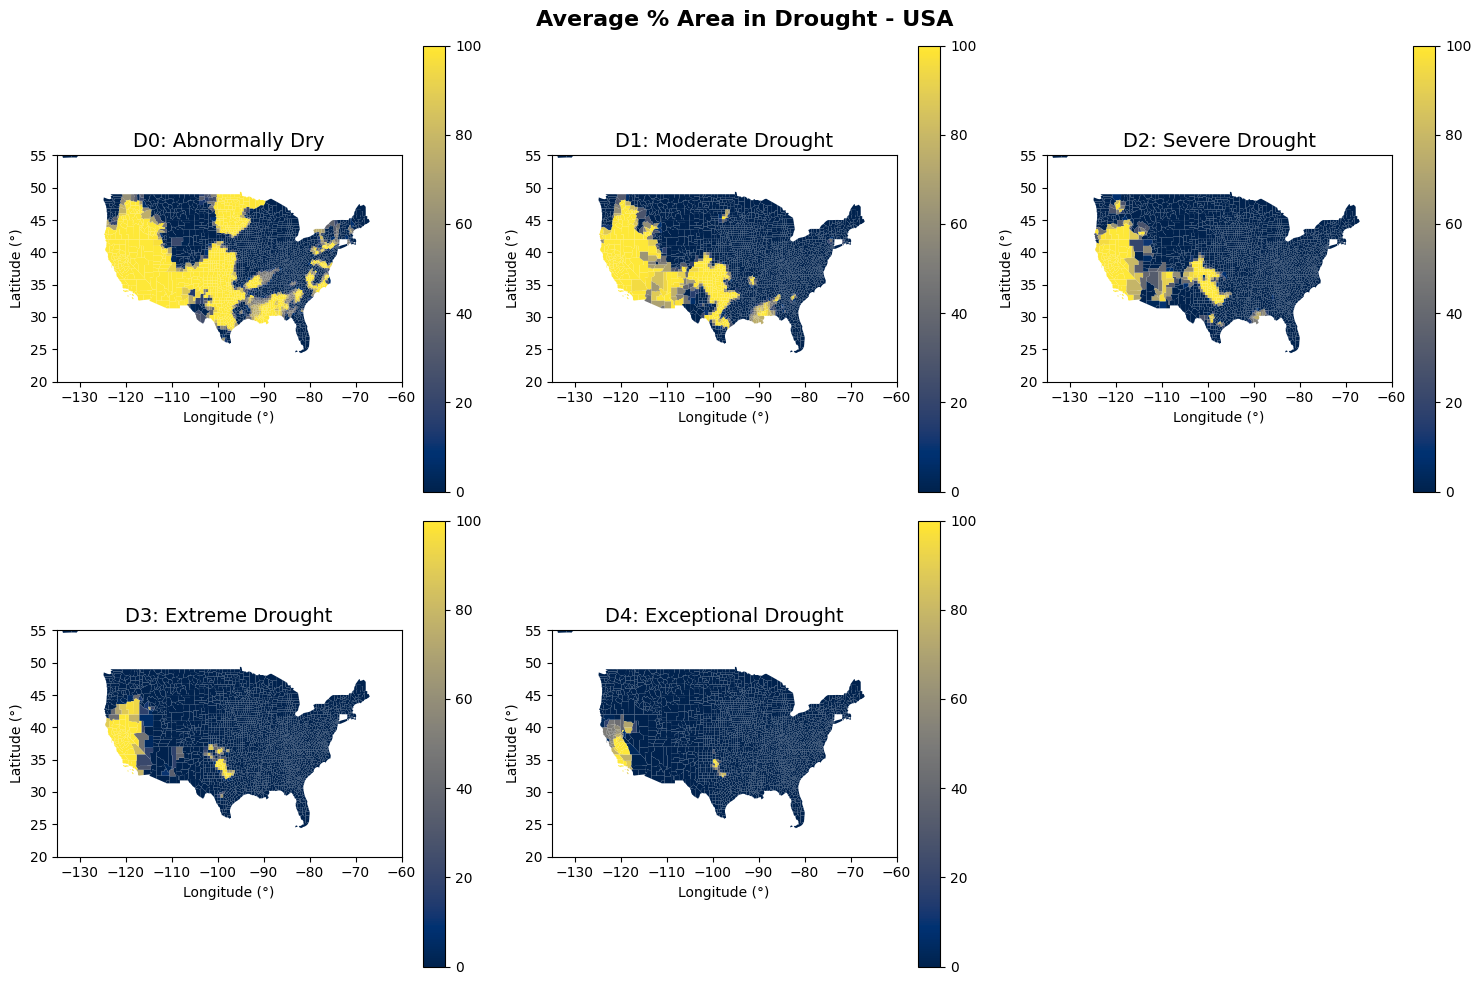

In [ ]:
# for a 30-day period starting from December 2, 2014.
plot_drought_data(start_date="2014-12-02", days=30)

Caption for the Drought Severity Maps (D0–D4) – USA (December 2014)

This figure visualizes the average percentage of land area in each U.S. county affected by different levels of drought (D0 to D4) during December 2014.

From the maps, we observe that abnormal dryness (D0) and moderate drought (D1) were widespread across the central and western U.S., while severe (D2), extreme (D3), and exceptional (D4) drought conditions were concentrated in California and parts of the Southwest. This pattern aligns with known drought events during this period, particularly the historic California drought of 2014, which had severe consequences for water supply and agriculture. These insights are crucial to understanding how drought evolves over time and help validate predictive models that aim to forecast drought severity using meteorological data.

📅 Fetching data from 2012-09-04 for 4 weeks (7-day intervals)
📥 Reading file for 2012-09-04...
📥 Reading file for 2012-09-11...
📥 Reading file for 2012-09-18...
📥 Reading file for 2012-09-25...


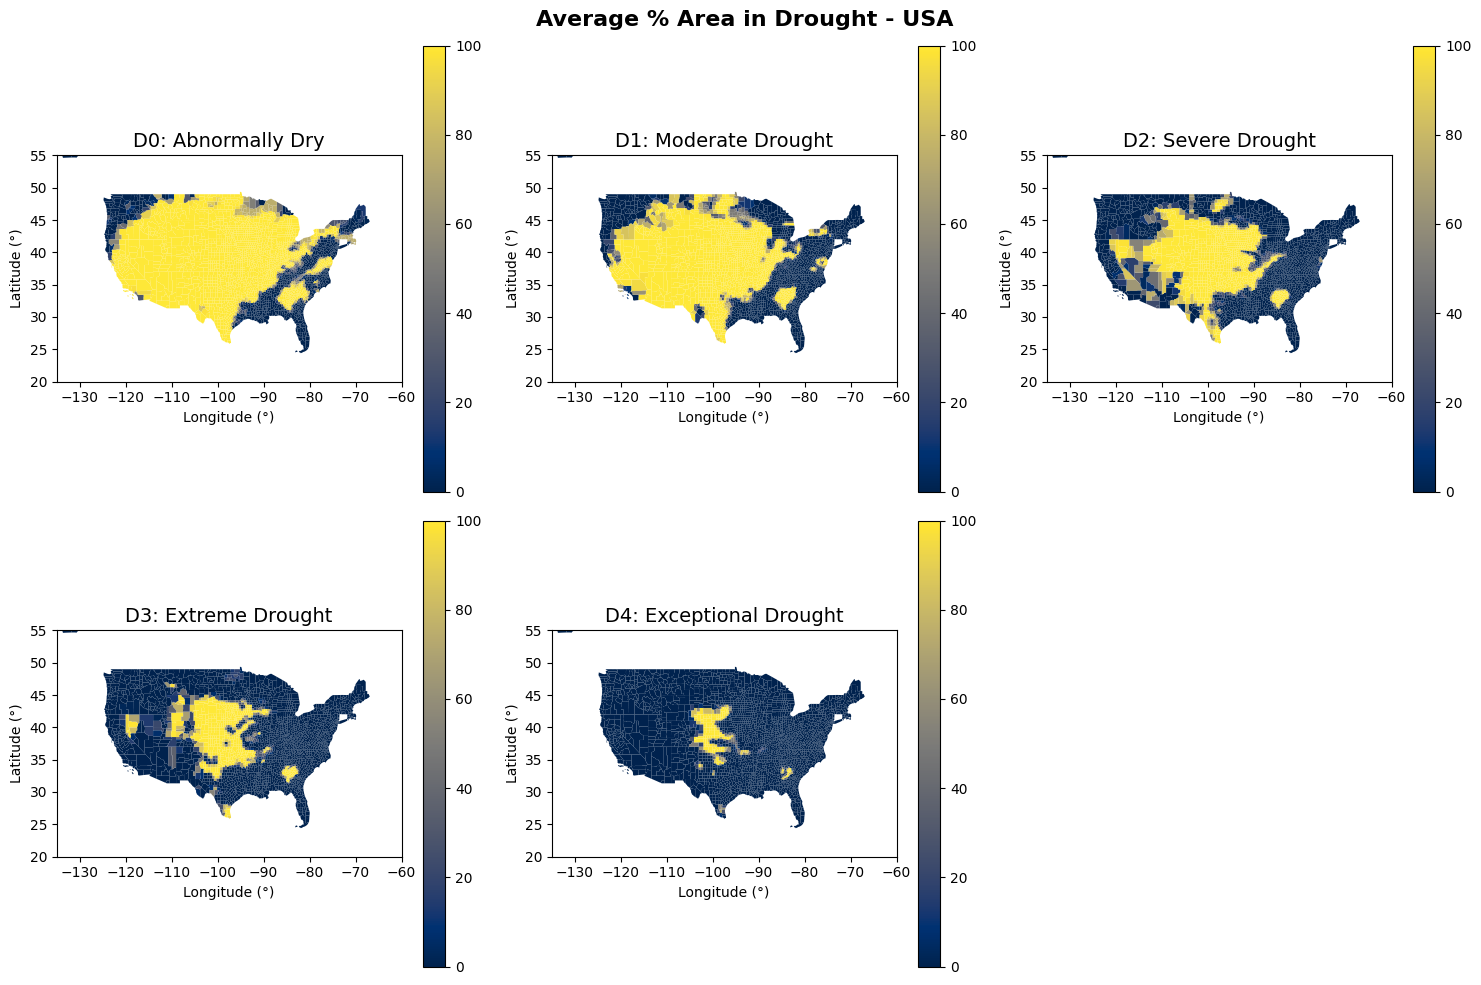

In [ ]:
# for a 30-day period starting from September 4, 2012.
plot_drought_data(start_date="2012-09-04", days=30)

Drought Severity in the U.S. – September 2012

This figure shows the average percentage of land in each U.S. county affected by different drought levels (D0–D4) in September 2012, using U.S. Drought Monitor data. D0 and D1 conditions were widespread, while D2–D4 droughts were concentrated in the central U.S., particularly in the Great Plains, aligning with the historic 2012 drought crisis. This visualization helps understand past drought patterns, supporting the project’s goal for better drought prediction and preparedness.

📅 Fetching data from 2019-05-07 for 4 weeks (7-day intervals)
📥 Reading file for 2019-05-07...
📥 Reading file for 2019-05-14...
📥 Reading file for 2019-05-21...
📥 Reading file for 2019-05-28...


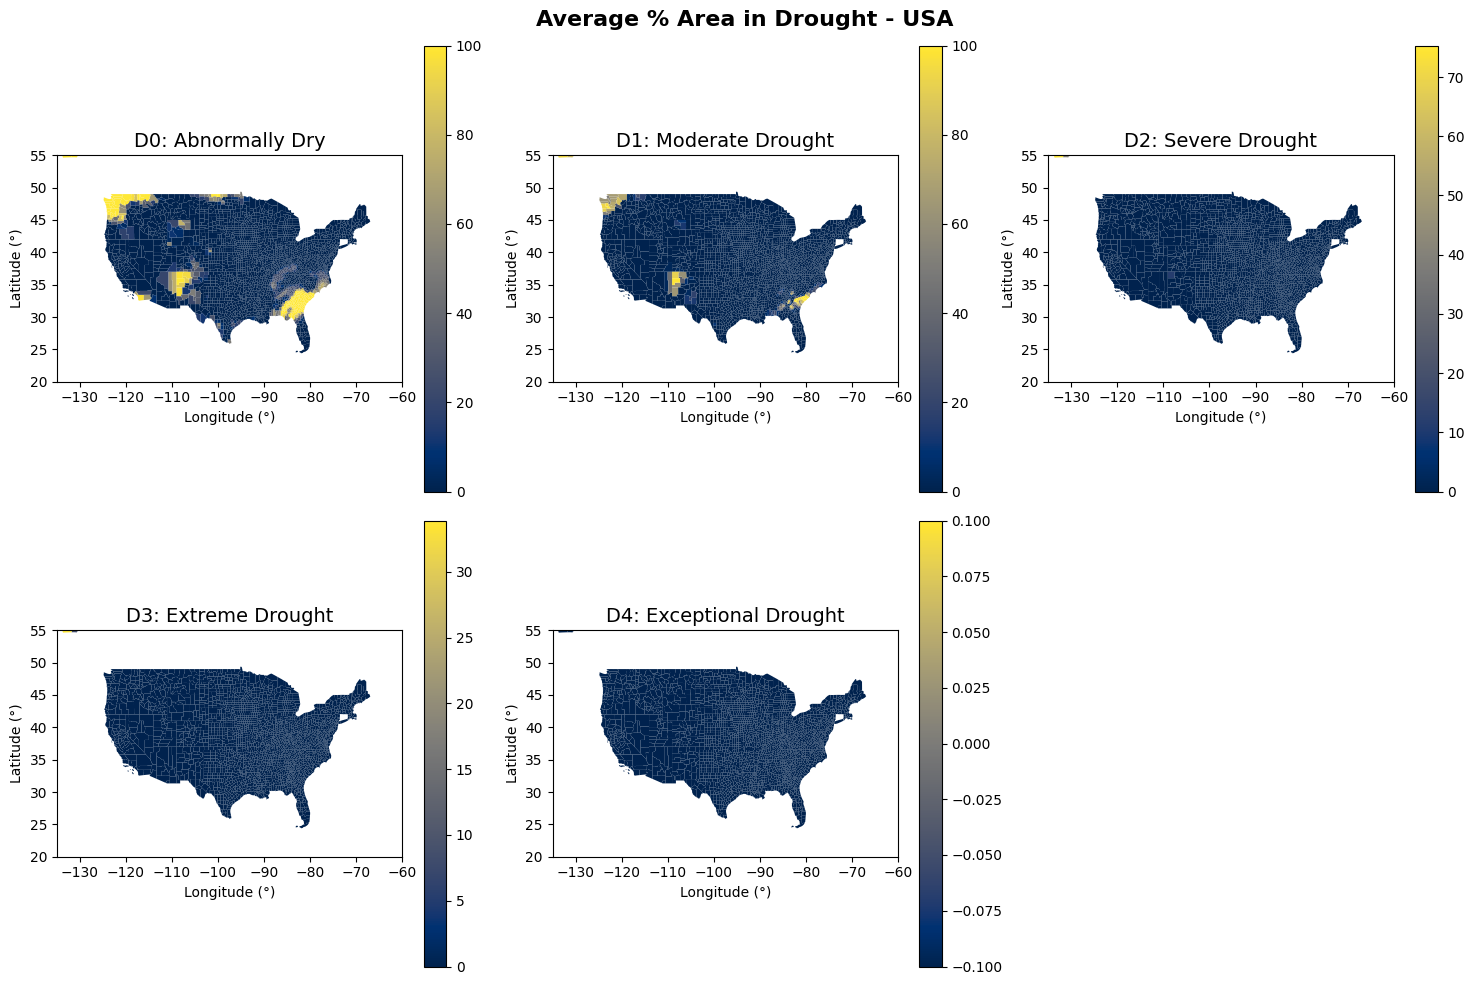

In [ ]:
plot_drought_data(start_date="2019-05-07", days=30)

This plot displays the average percentage of land in each U.S. county affected by different drought severity levels (D0–D4) in May 2019, based on U.S. Drought Monitor data. Unlike September 2012, when 54.8% of the U.S. was in drought, including severe (D2–D4) conditions, May 2019 saw minimal drought activity, with only scattered regions experiencing D0 (Abnormally Dry) and D1 (Moderate Drought). This aligns with the Standardized Precipitation Index (SPI), which recorded May 2019 as the wettest May since 1895, with 82.3% of the U.S. abnormally wet. The contrast between these two periods highlights the extreme variability of drought patterns, driven by precipitation, temperature, and other meteorological factors. Understanding these fluctuations is crucial for predictive modeling, reinforcing the importance of using meteorological data to improve drought forecasting and early warning systems.

In [ ]:
def plot_drought_state(start_date: str, state_abbr: str, years: int = 0, months: int = 0, days: int = 0,
                      shapefile_path: str = "/content/drive/MyDrive/MLPPproj/tl_2024_us_county/tl_2024_us_county.shp"):
    """
    Fetches and plots drought data for a specific state over a given time range.

    Parameters:
    - start_date (str): Start date in "YYYY-MM-DD" format.
    - state_abbr (str): State code (e.g., "06" for California).
    - years/months/days (int): Duration to pull data for.
    - shapefile_path (str): Path to county shapefile.

    Returns:
    - Subplots of average % area under each drought severity level (D0–D4).
    """

    date0 = datetime.datetime.strptime(start_date, "%Y-%m-%d")
    total_days = (years * 365) + (months * 30) + days
    num_weeks = total_days // 7
    if num_weeks == 0:
        print("⚠ Please provide a valid time period (years, months, or days).")
        return

    print(f"📅 Fetching data from {start_date} for {num_weeks} weeks (7-day intervals)")

    dt = datetime.timedelta(days=7)
    dates = [date0 + i * dt for i in range(num_weeks)]

    # Construct weekly drought file URLs
    fname_base = "https://droughtmonitor.unl.edu/DmData/GISData.aspx?mode=table&aoi=county&date="
    fnames = [fname_base + date.strftime("%Y-%m-%d") for date in dates]

    # Fetch drought data
    data = []
    for i, url in enumerate(fnames):
        print(f"📥 Reading file for {dates[i].strftime('%Y-%m-%d')}...")
        try:
            df = pd.read_csv(url)
            data.append(df)
        except Exception as e:
            print(f"❌ Failed to read data for {dates[i].strftime('%Y-%m-%d')}: {e}")

    if not data:
        print("⚠ No data fetched. Check date range.")
        return

    drought_data = pd.concat(data).reset_index(drop=True)

    # Load county shapefile
    cnty = gpd.read_file(shapefile_path)
    cnty["GEOID"] = cnty["GEOID"].astype(int)
    cnty_state = cnty[cnty["STATEFP"] == state_abbr]

    # Filter drought data to selected month
    sub = drought_data[drought_data["MapDate"].astype(str).str[4:6] == start_date[5:7]]

    # Average and clip values to 0–100
    drought_avg = sub[["FIPS", "D0", "D1", "D2", "D3", "D4"]].groupby("FIPS").mean().clip(0, 100).reset_index()

    # Merge shapefile with drought data
    drought_state = cnty_state.merge(drought_avg, left_on="GEOID", right_on="FIPS")

    # Plot
    drought_levels = ["D0", "D1", "D2", "D3", "D4"]
    titles = [
        "D0: Abnormally Dry",
        "D1: Moderate Drought",
        "D2: Severe Drought",
        "D3: Extreme Drought",
        "D4: Exceptional Drought"
    ]

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flatten()

    for i, level in enumerate(drought_levels):
        ax = drought_state.plot(column=level, legend=True, cmap="cividis", ax=axes[i], vmin=0, vmax=100)
        ax.set_title(f"{titles[i]} - {state_abbr}", fontsize=14)
        ax.set_xlabel("Longitude (°)", fontsize=10)
        ax.set_ylabel("Latitude (°)", fontsize=10)

    fig.delaxes(axes[-1])  # Remove unused 6th plot
    fig.suptitle(f"Average % Area in Drought - {state_abbr}", fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()

📅 Fetching data from 2014-12-02 for 4 weeks (7-day intervals)
📥 Reading file for 2014-12-02...
📥 Reading file for 2014-12-09...
📥 Reading file for 2014-12-16...
📥 Reading file for 2014-12-23...


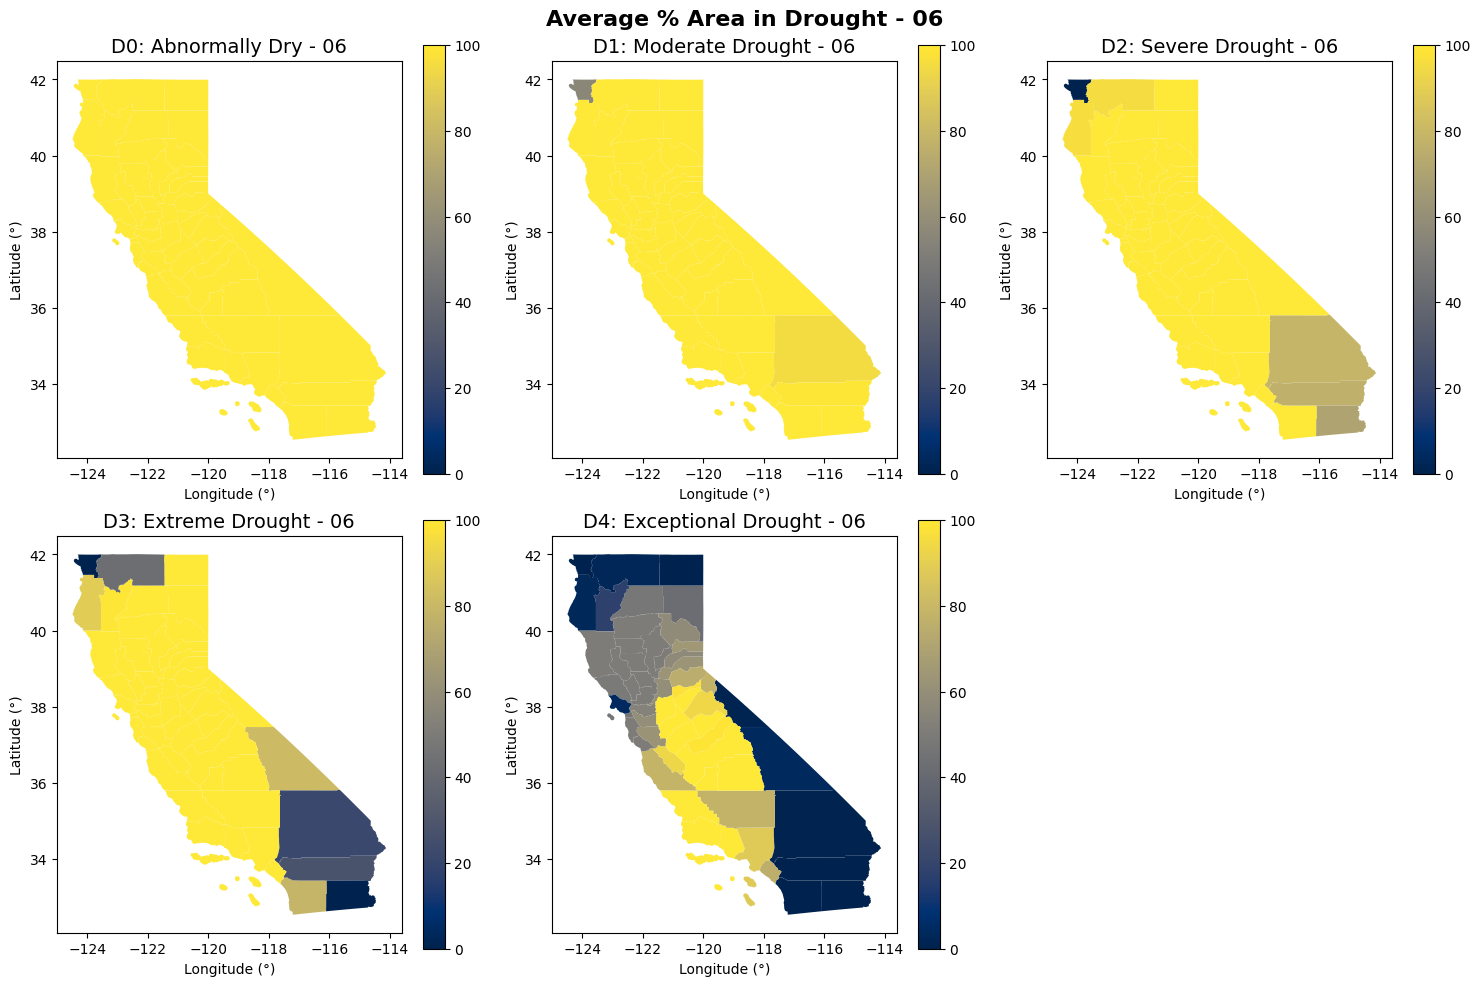

In [ ]:
# Plot the average drought severity (D0–D4) across counties in the state of California (state code "06")
# for a 30-day period starting from December 2, 2014.
# This helps visualize historical drought conditions in California during the winter of 2014.
plot_drought_state(start_date="2014-12-02", state_abbr="06", days=30)

Drought Severity in California – December 2014

This figure displays the average percentage of land area in each California county affected by different drought severity levels (D0–D4) in December 2014, based on U.S. Drought Monitor data. This cover significant portions of the state concentrated in Central and Southern California.

December 2014 was part of one of the most severe drought periods in California’s history, leading to water shortages, agricultural losses, and ecosystem stress. This visualization highlights the spatial variation in drought intensity.

📅 Fetching data from 2019-05-07 for 4 weeks (7-day intervals)
📥 Reading file for 2019-05-07...
📥 Reading file for 2019-05-14...
📥 Reading file for 2019-05-21...
📥 Reading file for 2019-05-28...


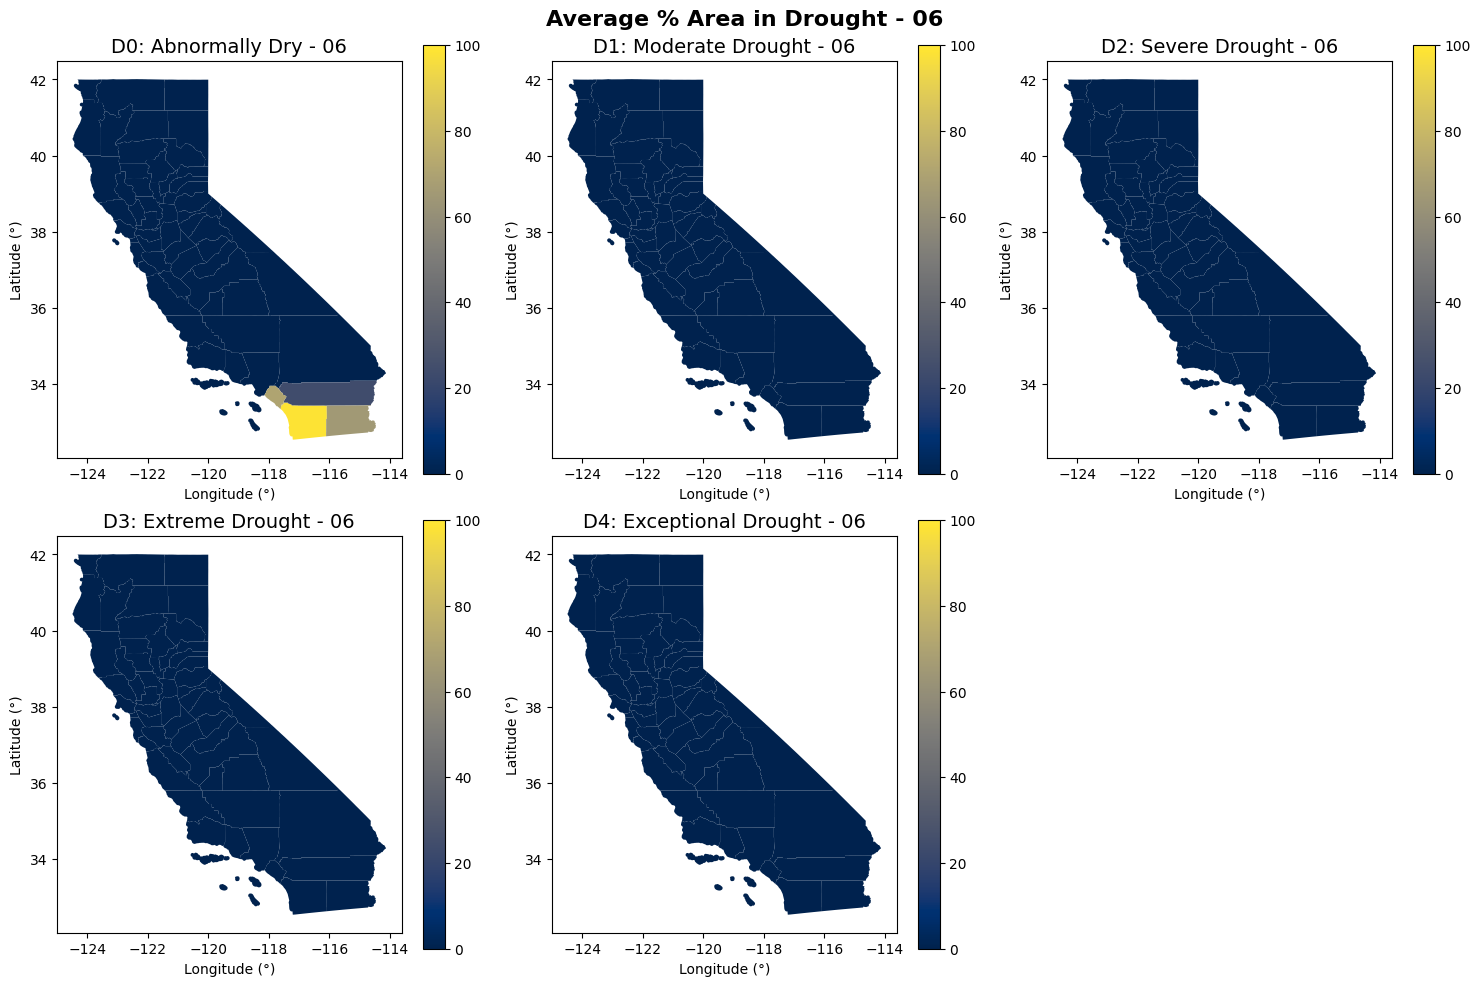

In [ ]:
# Plot the average drought severity (D0–D4) across counties in California (state code "06")
# for a 30-day period starting from May 7, 2019.
# This helps analyze drought conditions in California during late spring 2019.
plot_drought_state(start_date="2019-05-07", state_abbr="06", days=30)

Drought Severity in California – May 2019

This figure shows the average percentage of land area in each California county affected by different drought severity levels (D0–D4) in May 2019, based on U.S. Drought Monitor data. The lack of significant drought coverage across the state indicates a period of low drought intensity.

This contrasts sharply with historical drought trends in California, such as 2014’s severe drought, highlighting the high variability of drought conditions over time. The near absence of D1–D4 drought levels in this period suggests a relatively wet season and emphasizes the importance of tracking meteorological patterns to improve drought prediction and water management strategies.

In [ ]:
def plot_drought_states(start_date: str, state_fips_list: list, years: int = 0, months: int = 0, days: int = 0,
                        shapefile_path: str = "/content/drive/MyDrive/MLPPproj/tl_2024_us_county/tl_2024_us_county.shp"):
    """
    Fetches and plots drought data for multiple states over a given time range.

    Parameters:
    - start_date (str): Start date in "YYYY-MM-DD" format.
    - state_fips_list (list): List of STATEFP codes (e.g., ["19", "29", "31"] for Iowa, Missouri, Nebraska).
    - years (int, optional): Number of years to fetch.
    - months (int, optional): Number of months to fetch.
    - days (int, optional): Number of days to fetch.
    - shapefile_path (str): Path to the county shapefile.

    Returns:
    - Displays subplots of drought severity levels (D0-D4) for the selected states.
    """

    # Convert start date to datetime format
    date0 = datetime.datetime.strptime(start_date, "%Y-%m-%d")

    # Convert total time into weeks
    total_days = (years * 365) + (months * 30) + days  # Approximate conversion
    num_weeks = total_days // 7  # Convert to 7-day intervals

    # Ensure a valid time period is provided
    if num_weeks == 0:
        print("⚠ Please provide a valid time period (years, months, or days).")
        return

    print(f"📅 Fetching data from {start_date} for {num_weeks} weeks (7-day intervals)")

    # Generate a list of dates spaced 7 days apart
    dt = datetime.timedelta(days=7)
    dates = [date0 + i * dt for i in range(num_weeks)]

    # Generate file URLs for weekly drought data
    fname_base = "https://droughtmonitor.unl.edu/DmData/GISData.aspx?mode=table&aoi=county&date="
    fnames = [fname_base + date.strftime("%Y-%m-%d") for date in dates]

    # --- Fetch and merge data ---
    data = []
    for i, url in enumerate(fnames):
        print(f"📥 Reading file for {dates[i].strftime('%Y-%m-%d')}...")
        try:
            df = pd.read_csv(url, dtype={"FIPS": str})  # Ensure FIPS is string
            data.append(df)
        except Exception as e:
            print(f"❌ Failed to read data for {dates[i].strftime('%Y-%m-%d')}: {e}")  # Handle errors

    # Concatenate all collected data
    if data:
        drought_data = pd.concat(data).reset_index(drop=True)
    else:
        print("⚠ No data was fetched. Please check the date range.")
        return

    # --- Load the county shapefile ---
    cnty = gpd.read_file(shapefile_path)  # Load U.S. counties shapefile
    cnty["STATEFP"] = cnty["STATEFP"].astype(str)  # Ensure STATEFP is string
    cnty["GEOID"] = cnty["GEOID"].astype(str)  # Ensure GEOID is string

    # Filter counties that belong to the selected states
    cnty_states = cnty[cnty["STATEFP"].isin(state_fips_list)]

    # Merge the drought data with the selected states' county geometries
    sub = drought_data[drought_data["MapDate"].astype(str).str[4:6] == start_date[5:7]]  # Filter by month
    drought_states = cnty_states.merge(
        sub[["FIPS", "D0", "D1", "D2", "D3", "D4"]].groupby("FIPS").mean().reset_index(),
        left_on="GEOID",
        right_on="FIPS"
    )

    # Check if data exists for the selected states
    if drought_states.empty:
        print(f"⚠ No drought data available for the selected states: {state_fips_list}.")
        return

    # --- Visualization ---
    # Define drought severity levels and their labels
    drought_levels = ["D0", "D1", "D2", "D3", "D4"]
    titles = [
        "D0: Abnormally Dry",
        "D1: Moderate Drought",
        "D2: Severe Drought",
        "D3: Extreme Drought",
        "D4: Exceptional Drought"
    ]

    # Create a 3x2 grid of subplots for drought visualization
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flatten()

    # Plot each drought level for the selected states
    for i, level in enumerate(drought_levels):
        ax = drought_states.plot(column=level, legend=True, cmap="cividis", ax=axes[i])  # Plot drought severity
        ax.set_title(f"{titles[i]} - Selected States", fontsize=14)  # Set title

        # Set axis labels with units
        ax.set_xlabel("Longitude (°)", fontsize=10)
        ax.set_ylabel("Latitude (°)", fontsize=10)

    # Remove the empty 6th subplot (since only 5 are used)
    fig.delaxes(axes[-1])

    # Set the main title for the figure
    fig.suptitle("Average % Area in Drought - Selected States", fontsize=16, fontweight="bold")

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

The function effectively analyzes and visualizes drought conditions across multiple selected states, making it ideal for regional drought comparisons and trend analysis.

📅 Fetching data from 2012-09-01 for 12 weeks (7-day intervals)
📥 Reading file for 2012-09-01...
📥 Reading file for 2012-09-08...
📥 Reading file for 2012-09-15...
📥 Reading file for 2012-09-22...
📥 Reading file for 2012-09-29...
📥 Reading file for 2012-10-06...
📥 Reading file for 2012-10-13...
📥 Reading file for 2012-10-20...
📥 Reading file for 2012-10-27...
📥 Reading file for 2012-11-03...
📥 Reading file for 2012-11-10...
📥 Reading file for 2012-11-17...


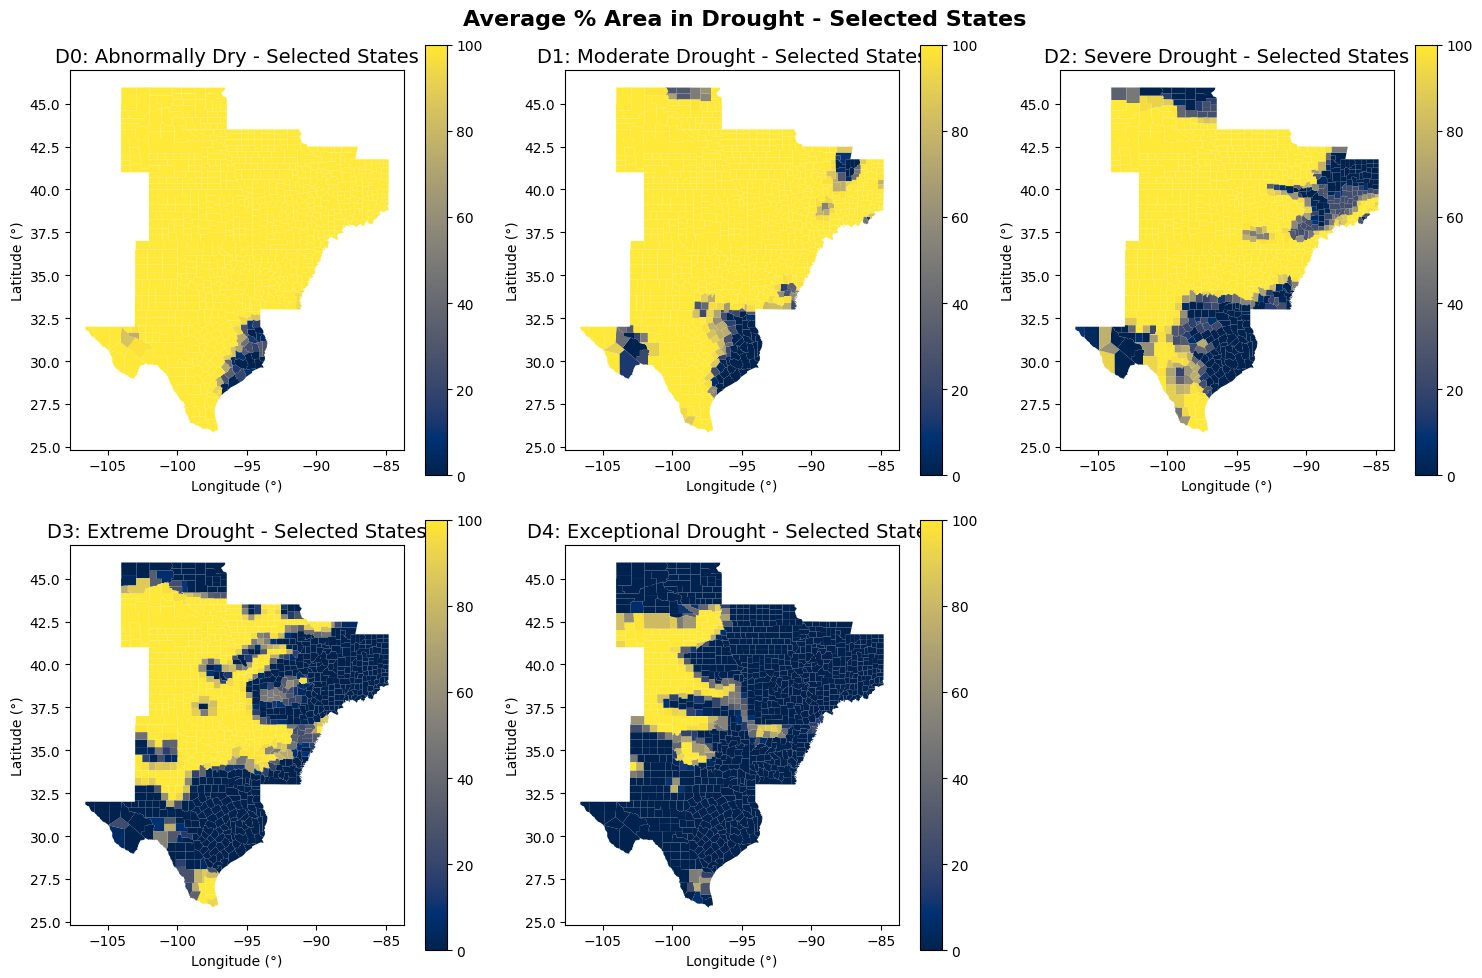

In [ ]:
# The selected states include:
#   - Iowa (19), Missouri (29), Nebraska (31), Kansas (20), Oklahoma (40), Texas (48),
#   - Arkansas (05), Illinois (17), Indiana (18), and South Dakota (46).
# This helps analyze the regional drought conditions in the Midwest and Southern Plains during the peak of the 2012 drought crisis.
plot_drought_states(start_date="2012-09-01",
                    state_fips_list=["19", "29", "31", "20", "40", "48", "05", "17", "18", "46"],
                    months=3)

This figure illustrates the average percentage of land area in selected Midwest and Southern Plains states affected by drought (D0–D4) from September to November 2012. The majority of the region experienced severe drought (D2) and extreme drought (D3), with some areas reaching exceptional drought (D4), particularly in Nebraska, Kansas, and Texas. This visualization highlights the severity of the 2012 drought crisis, which had significant agricultural and economic impacts across these states.

In [ ]:
# Load the paleoclimate dataset containing historical drought data.
# This dataset includes the Palmer Modified Drought Index (PMDI) for various time periods,
# providing insights into past drought and wet conditions across the U.S.
# The data is used to analyze long-term drought trends and compare them with modern observations.
paleo_data = pd.read_csv("/content/drive/MyDrive/MLPPproj/PALEO-Total.csv")

In [ ]:
# Convert the 'DATE' column to extract year numbers
paleo_data_filtered = paleo_data[paleo_data["DATE"].str.contains("year_")]

# Extract the numerical year values
paleo_data_filtered["Year"] = paleo_data_filtered["DATE"].str.extract("(\d+)").astype(int)

# Filter the data for years between 2011 and 2020
paleo_data_filtered = paleo_data_filtered[(paleo_data_filtered["Year"] >= 2000) & (paleo_data_filtered["Year"] <= 2017)]

# Drop the temporary 'Year' column
paleo_data_filtered = paleo_data_filtered.drop(columns=["Year"])

In [ ]:
paleo_data_filtered

,0,DATE,D0,D1,D2,D3,D4,-9,W0,W1,W2,W3,W4
2000,29.7,year_2000,53.2,33.3,14.1,2.5,0.4,0.0,15.4,6.4,1.9,0.1,0.0
2001,37.0,year_2001,40.5,23.1,10.4,2.5,0.1,0.0,20.7,8.0,1.6,0.3,0.0
2002,28.3,year_2002,55.2,41.5,27.7,14.6,4.4,0.0,14.7,4.3,0.9,0.2,0.1
2003,34.0,year_2003,39.4,24.4,11.0,1.7,0.1,0.0,24.9,14.6,7.1,2.6,0.6
2004,33.9,year_2004,35.3,23.2,9.0,1.5,0.0,0.0,29.0,15.8,6.2,0.6,0.0
2005,45.6,year_2005,13.6,2.8,1.1,0.1,0.0,0.0,39.1,20.8,8.5,2.1,0.4
2006,26.7,year_2006,56.6,32.3,13.5,3.2,0.4,0.0,14.9,6.5,2.3,0.5,0.1
2007,27.9,year_2007,46.2,30.6,17.8,5.6,0.7,0.0,24.2,12.9,5.5,1.0,0.1
2008,40.0,year_2008,33.5,18.0,6.9,1.0,0.0,0.0,24.7,14.8,6.7,3.0,0.8
2009,37.6,year_2009,27.5,14.9,4.5,1.1,0.0,0.0,33.0,18.0,6.2,1.0,0.0


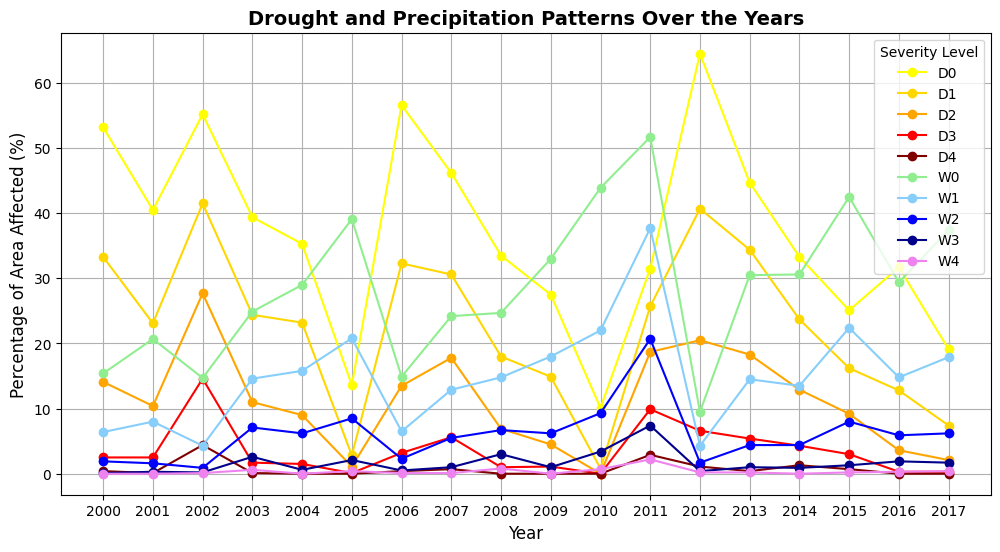

In [ ]:
# Visualized the yearly trends of drought (D0-D4) and wet (W0-W4) conditions using color-coded line plots to analyze historical drought patterns.
# Extract year values from the 'DATE' column for time-series analysis
paleo_data_filtered["Year"] = paleo_data_filtered["DATE"].str.extract("(\d+)").astype(str)

# Select columns representing different drought (D0-D4) and wet (W0-W4) severity levels
columns_to_plot = ["D0", "D1", "D2", "D3", "D4", "W0", "W1", "W2", "W3", "W4"]

# Define a color map to differentiate drought and wet conditions in the plot
color_map = {
    "D0": "yellow",      # D0 - Abnormally Dry
    "D1": "gold",        # D1 - Moderate Drought
    "D2": "orange",      # D2 - Severe Drought
    "D3": "red",         # D3 - Extreme Drought
    "D4": "maroon",      # D4 - Exceptional Drought
    "W0": "lightgreen",  # W0 - Abnormally Wet
    "W1": "lightskyblue",# W1 - Moderately Wet
    "W2": "blue",        # W2 - Severely Wet
    "W3": "darkblue",    # W3 - Extremely Wet
    "W4": "violet"       # W4 - Exceptionally Wet
}

# Create a line plot to visualize the historical drought and wet conditions over time
plt.figure(figsize=(12, 6))

# Plot each severity level with its respective color
for col in columns_to_plot:
    plt.plot(paleo_data_filtered["Year"], paleo_data_filtered[col], label=col,
             marker="o", linestyle="-", color=color_map[col])

# Add axis labels with units
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Area Affected (%)", fontsize=12)

# Add a title to summarize the visualization
plt.title("Drought and Precipitation Patterns Over the Years", fontsize=14, fontweight="bold")

# Include a legend for clarity
plt.legend(title="Severity Level")

# Add gridlines for better readability
plt.grid(True)

# Show the final plot
plt.show()

This figure compares drought (D0-D4) and precipitation (W0-W4) patterns from 2000 to 2017, highlighting the variability in dry and wet conditions across the U.S. Drought levels (D0-D4) generally show more fluctuations and higher peaks compared to precipitation levels (W0-W4), indicating periods of prolonged dryness. Notably, severe drought events peaked around 2012, aligning with one of the worst droughts in recent history, while wetter conditions saw spikes around 2010 and 2015. These trends demonstrate the shifting climate conditions and the importance of monitoring both drought and precipitation for predictive modeling and climate adaptation.

Until now, I have explored drought data, analyzing its severity, historical trends, and spatial patterns. Now,focusing to meteorological data from Kaggle, which includes key weather indicators such as temperature, humidity, wind speed, and precipitation. This dataset will help us understand how meteorological conditions influence drought formation and serve as input for predictive modeling in our study.

Meteorological Data - Data Set -2 , I am commenting the code , because extracting runs for long time I saved it in my drive



In [ ]:
# # Load and preprocess meteorological data in chunks to efficiently handle large datasets.

# # Define file path for the meteorological dataset
# file_path = "/content/drive/MyDrive/MLPPproj/Meteorogical data/train_timeseries.csv"

# # Set chunk size for memory-efficient processing
# chunksize = 100000
# filtered_chunks = []

# # Read and process the dataset in chunks
# for chunk in pd.read_csv(file_path, chunksize=chunksize, parse_dates=["date"]):

#     # Remove data from the years 2000-2010 to focus on more recent trends
#     chunk_filtered = chunk[~chunk["date"].dt.year.between(2000, 2010)]

#     # Drop rows where the 'score' column has missing values
#     chunk_filtered = chunk_filtered.dropna(subset=["score"])

#     # Append the cleaned chunk to the list
#     filtered_chunks.append(chunk_filtered)

# # Concatenate all processed chunks into a single cleaned dataset
# meteo1 = pd.concat(filtered_chunks, ignore_index=True)

# # Save the cleaned dataset to a new CSV file for further analysis
# meteo1.to_csv("meteo1_clean.csv", index=False)

# print("✅ Filtered data saved successfully!")

✅ Filtered data saved successfully!


This code efficiently processes, filters, and cleans a large meteorological dataset by removing data from 2000-2010, dropping missing values in the “score” column, and saving the refined first part of second dataset.

In [ ]:
meteo1

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2011-01-04,0.05,100.53,3.67,6.28,-0.59,-0.55,13.98,0.18,...,4.16,1.64,2.30,0.72,1.58,2.51,3.74,1.22,2.52,0.4590
1,1001,2011-01-11,0.82,101.06,3.29,-0.18,-1.93,-1.91,3.10,-4.96,...,-0.28,2.40,4.27,0.20,4.07,4.43,7.10,0.33,6.77,0.4590
2,1001,2011-01-18,4.84,99.61,6.32,7.32,6.98,6.98,10.76,4.57,...,7.07,1.70,2.01,1.05,0.96,3.12,4.78,1.88,2.90,1.0121
3,1001,2011-01-25,11.61,99.81,5.63,6.21,5.34,5.34,8.99,3.82,...,6.10,2.06,4.09,0.36,3.73,3.76,6.17,0.67,5.50,1.0121
4,1001,2011-02-01,35.05,99.73,9.04,13.10,12.09,12.09,17.03,5.67,...,13.01,4.06,5.71,2.15,3.56,7.14,10.17,4.57,5.60,1.0121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972799,56043,2016-11-29,0.04,82.47,2.19,-4.27,-9.36,-9.26,-1.51,-7.22,...,-4.38,6.93,10.27,3.08,7.18,9.42,12.59,5.62,6.97,0.0000
972800,56043,2016-12-06,0.13,82.59,0.91,-11.96,-18.65,-17.90,-6.85,-15.24,...,-11.98,2.27,3.97,0.95,3.02,3.07,5.16,0.83,4.33,0.0000
972801,56043,2016-12-13,0.02,82.86,1.40,-9.56,-14.18,-13.95,-2.69,-13.01,...,-10.95,3.64,6.59,1.28,5.31,5.33,8.35,2.13,6.22,0.0000
972802,56043,2016-12-20,0.32,83.12,2.73,-2.55,-6.90,-6.84,2.66,-7.77,...,-3.94,6.16,8.43,3.44,4.99,8.99,10.14,6.67,3.47,0.0000


In [ ]:
# # Load additional meteorological datasets to combine with meteo1 as my training data set will be of years 2011-2020
# meteo2 = pd.read_csv("/content/drive/MyDrive/MLPPproj/Meteorogical data/validation_timeseries.csv")

# meteo3 = pd.read_csv("/content/drive/MyDrive/MLPPproj/Meteorogical data/test_timeseries.csv")

In [ ]:
# # Remove rows with missing values in the 'score' column

# meteo2 = meteo2.dropna(subset=["score"])

# meteo3 = meteo3.dropna(subset=["score"])

In [ ]:
meteo2

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
2,1001,2017-01-03,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,...,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0000
9,1001,2017-01-10,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,...,5.81,3.22,4.24,2.52,1.72,6.19,7.55,4.68,2.86,2.0000
16,1001,2017-01-17,0.14,100.60,11.41,17.21,16.06,16.06,23.03,13.15,...,17.10,2.24,3.61,1.71,1.90,4.93,5.90,2.76,3.15,2.0000
23,1001,2017-01-24,0.00,99.72,5.60,9.27,5.34,5.35,16.23,4.18,...,8.95,1.82,2.34,1.03,1.31,3.52,6.49,1.47,5.02,1.0000
30,1001,2017-01-31,0.00,100.37,7.31,11.38,9.21,9.21,20.29,5.05,...,11.32,2.31,3.00,1.76,1.24,5.00,7.40,2.88,4.52,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268805,56043,2018-11-27,0.21,82.62,2.88,-0.63,-6.30,-6.25,5.40,-5.43,...,-1.94,3.80,5.44,2.93,2.51,6.21,9.43,4.63,4.80,0.2572
2268812,56043,2018-12-04,0.01,83.32,1.47,-7.66,-14.71,-13.42,-1.41,-11.86,...,-8.96,3.26,5.23,2.20,3.03,4.82,6.46,3.79,2.67,0.2572
2268819,56043,2018-12-11,0.06,82.94,2.12,-3.04,-10.21,-9.60,2.45,-6.68,...,-4.08,3.59,5.09,2.07,3.01,5.69,8.44,3.42,5.01,0.2572
2268826,56043,2018-12-18,0.06,82.77,3.09,0.69,-5.36,-5.17,5.77,-4.12,...,-1.31,3.64,4.69,2.04,2.65,5.79,7.52,3.47,4.05,0.2572


In [ ]:
meteo3

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0000
7,1001,2019-01-08,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,...,13.05,2.33,3.40,1.68,1.72,5.13,6.51,3.67,2.85,0.0000
14,1001,2019-01-15,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,...,3.91,1.73,2.40,1.36,1.04,3.28,4.13,2.39,1.75,0.0000
21,1001,2019-01-22,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,...,6.08,3.68,4.57,2.49,2.07,6.65,8.56,5.01,3.55,0.0000
28,1001,2019-01-29,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,...,2.18,3.10,4.52,1.71,2.81,5.62,6.96,3.60,3.35,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271917,56043,2020-12-01,1.24,83.55,2.58,-2.42,-7.58,-5.00,0.38,-6.79,...,-2.74,5.42,8.52,2.85,5.68,7.81,10.34,5.13,5.21,3.5109
2271924,56043,2020-12-08,0.00,83.70,2.05,1.32,-10.65,-4.67,8.08,-3.27,...,-1.57,3.05,3.85,2.36,1.49,4.73,6.30,3.85,2.45,3.5109
2271931,56043,2020-12-15,0.14,82.90,2.04,-5.19,-10.64,-7.91,0.29,-8.63,...,-6.81,2.88,3.90,1.68,2.21,4.39,6.50,2.83,3.66,3.5182
2271938,56043,2020-12-22,1.64,82.00,3.13,-0.05,-5.29,-2.67,6.87,-7.05,...,-0.82,8.83,13.78,6.64,7.14,11.90,17.31,9.05,8.25,3.5182


In [ ]:
# # Combine the three data into a single dataset.

# # Concatenate the three datasets  into one unified dataframe.
# meteo = pd.concat([meteo1, meteo2, meteo3], ignore_index=True)

# # Save the merged dataset to a CSV file for further analysis and modeling.
# meteo.to_csv("/content/drive/MyDrive/MLPPproj/Meteo clean/meteo.csv", index=False)

I commented all extracted code and from below snippet I loaded from drive

In [ ]:
meteo = pd.read_csv("/content/drive/MyDrive/MLPPproj/Meteo clean/meteo.csv")

In [ ]:
drought_data = pd.read_csv("/content/drive/MyDrive/MLPPproj/drought_data.csv")

In [ ]:
drought_data #This is the drought data where we collected 2011 - 2020 in the first part of our code

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20110104,2013,Aleutians East Borough,AK,4.11,95.89,0.0,0.00,0.00,0.0,2011-01-04,2011-01-10,1
1,20110104,2016,Aleutians West Census Area,AK,100.00,0.00,0.0,0.00,0.00,0.0,2011-01-04,2011-01-10,1
2,20110104,2020,Anchorage Municipality,AK,0.00,100.00,0.0,0.00,0.00,0.0,2011-01-04,2011-01-10,1
3,20110104,2050,Bethel Census Area,AK,99.57,0.43,0.0,0.00,0.00,0.0,2011-01-04,2011-01-10,1
4,20110104,2060,Bristol Bay Borough,AK,0.00,100.00,0.0,0.00,0.00,0.0,2011-01-04,2011-01-10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681357,20201229,56037,Sweetwater County,WY,0.00,100.00,100.0,59.57,11.82,0.0,2020-12-29,2021-01-04,1
1681358,20201229,56039,Teton County,WY,86.70,13.30,0.0,0.00,0.00,0.0,2020-12-29,2021-01-04,1
1681359,20201229,56041,Uinta County,WY,0.00,100.00,100.0,35.80,0.00,0.0,2020-12-29,2021-01-04,1
1681360,20201229,56043,Washakie County,WY,0.00,100.00,100.0,85.71,66.10,0.0,2020-12-29,2021-01-04,1


In [ ]:
# Filter the drought dataset to include only records where FIPS codes are ≤ 56043.
# This ensures compatibility with the meteorological dataset, which does not contain FIPS codes greater than 56043.

drought_data = drought_data[drought_data["FIPS"] <= 56043]
drought_data

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20110104,2013,Aleutians East Borough,AK,4.11,95.89,0.00,0.00,0.00,0.0,2011-01-04,2011-01-10,1
1,20110104,2016,Aleutians West Census Area,AK,100.00,0.00,0.00,0.00,0.00,0.0,2011-01-04,2011-01-10,1
2,20110104,2020,Anchorage Municipality,AK,0.00,100.00,0.00,0.00,0.00,0.0,2011-01-04,2011-01-10,1
3,20110104,2050,Bethel Census Area,AK,99.57,0.43,0.00,0.00,0.00,0.0,2011-01-04,2011-01-10,1
4,20110104,2060,Bristol Bay Borough,AK,0.00,100.00,0.00,0.00,0.00,0.0,2011-01-04,2011-01-10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681356,20201229,56035,Sublette County,WY,1.68,98.32,83.31,60.26,0.00,0.0,2020-12-29,2021-01-04,1
1681357,20201229,56037,Sweetwater County,WY,0.00,100.00,100.00,59.57,11.82,0.0,2020-12-29,2021-01-04,1
1681358,20201229,56039,Teton County,WY,86.70,13.30,0.00,0.00,0.00,0.0,2020-12-29,2021-01-04,1
1681359,20201229,56041,Uinta County,WY,0.00,100.00,100.00,35.80,0.00,0.0,2020-12-29,2021-01-04,1


In [ ]:
# Extract unique FIPS codes from the drought dataset to check geographic coverage.

unique_fips_drought = drought_data["FIPS"].unique()  # Get unique FIPS codes in the dataset
unique_fips_drought.sort()  # Sort the unique FIPS codes in ascending order
len(unique_fips_drought)  # Count the number of unique FIPS codes

3142

In [ ]:
# Extract unique FIPS codes from the meteorological dataset
unique_meteofips = meteo["fips"].unique()

# Sort the FIPS codes for easier comparison or inspection
unique_meteofips.sort()

# Get the total number of unique FIPS codes (i.e., counties) present in the meteorological data
len(unique_meteofips)

3108

In [ ]:
# Convert the arrays of unique FIPS codes into sets for comparison
set_fips_drought = set(unique_fips_drought)  # FIPS codes in the drought dataset
set_meteofips = set(unique_meteofips)        # FIPS codes in the meteorological dataset

# Identify FIPS codes present in the drought data but missing in the meteorological data
missing_in_meteo = list(set_fips_drought - set_meteofips)

# Identify FIPS codes present in the meteorological data but missing in the drought data
missing_in_drought = list(set_meteofips - set_fips_drought)

In [ ]:
missing_in_meteo

[np.int64(2050),
 np.int64(2180),
 np.int64(2185),
 np.int64(2060),
 np.int64(2188),
 np.int64(2063),
 np.int64(2066),
 np.int64(2195),
 np.int64(2068),
 np.int64(2070),
 np.int64(2198),
 np.int64(15001),
 np.int64(15003),
 np.int64(15005),
 np.int64(15007),
 np.int64(15009),
 np.int64(2090),
 np.int64(2220),
 np.int64(2100),
 np.int64(2230),
 np.int64(2105),
 np.int64(2110),
 np.int64(2240),
 np.int64(2122),
 np.int64(2130),
 np.int64(2013),
 np.int64(2016),
 np.int64(2275),
 np.int64(2020),
 np.int64(2150),
 np.int64(2282),
 np.int64(2158),
 np.int64(2290),
 np.int64(2164),
 np.int64(2170)]

In [ ]:
missing_in_drought

[np.int64(51515)]

In [ ]:
drought_data = drought_data[~drought_data["FIPS"].isin(missing_in_meteo)]
meteo= meteo[meteo["fips"] != 51515]

In [ ]:
drought_data

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
30,20110104,1001,Autauga County,AL,54.61,45.39,0.51,0.00,0.00,0.0,2011-01-04,2011-01-10,1
31,20110104,1003,Baldwin County,AL,0.00,100.00,60.73,29.45,0.00,0.0,2011-01-04,2011-01-10,1
32,20110104,1005,Barbour County,AL,0.00,100.00,100.00,100.00,0.00,0.0,2011-01-04,2011-01-10,1
33,20110104,1007,Bibb County,AL,95.94,4.06,0.00,0.00,0.00,0.0,2011-01-04,2011-01-10,1
34,20110104,1009,Blount County,AL,0.00,100.00,50.08,0.00,0.00,0.0,2011-01-04,2011-01-10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681356,20201229,56035,Sublette County,WY,1.68,98.32,83.31,60.26,0.00,0.0,2020-12-29,2021-01-04,1
1681357,20201229,56037,Sweetwater County,WY,0.00,100.00,100.00,59.57,11.82,0.0,2020-12-29,2021-01-04,1
1681358,20201229,56039,Teton County,WY,86.70,13.30,0.00,0.00,0.00,0.0,2020-12-29,2021-01-04,1
1681359,20201229,56041,Uinta County,WY,0.00,100.00,100.00,35.80,0.00,0.0,2020-12-29,2021-01-04,1


In [ ]:
meteo

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2011-01-04 00:00:00,0.05,100.53,3.67,6.28,-0.59,-0.55,13.98,0.18,...,4.16,1.64,2.30,0.72,1.58,2.51,3.74,1.22,2.52,0.4590
1,1001,2011-01-11 00:00:00,0.82,101.06,3.29,-0.18,-1.93,-1.91,3.10,-4.96,...,-0.28,2.40,4.27,0.20,4.07,4.43,7.10,0.33,6.77,0.4590
2,1001,2011-01-18 00:00:00,4.84,99.61,6.32,7.32,6.98,6.98,10.76,4.57,...,7.07,1.70,2.01,1.05,0.96,3.12,4.78,1.88,2.90,1.0121
3,1001,2011-01-25 00:00:00,11.61,99.81,5.63,6.21,5.34,5.34,8.99,3.82,...,6.10,2.06,4.09,0.36,3.73,3.76,6.17,0.67,5.50,1.0121
4,1001,2011-02-01 00:00:00,35.05,99.73,9.04,13.10,12.09,12.09,17.03,5.67,...,13.01,4.06,5.71,2.15,3.56,7.14,10.17,4.57,5.60,1.0121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622371,56043,2020-12-01,1.24,83.55,2.58,-2.42,-7.58,-5.00,0.38,-6.79,...,-2.74,5.42,8.52,2.85,5.68,7.81,10.34,5.13,5.21,3.5109
1622372,56043,2020-12-08,0.00,83.70,2.05,1.32,-10.65,-4.67,8.08,-3.27,...,-1.57,3.05,3.85,2.36,1.49,4.73,6.30,3.85,2.45,3.5109
1622373,56043,2020-12-15,0.14,82.90,2.04,-5.19,-10.64,-7.91,0.29,-8.63,...,-6.81,2.88,3.90,1.68,2.21,4.39,6.50,2.83,3.66,3.5182
1622374,56043,2020-12-22,1.64,82.00,3.13,-0.05,-5.29,-2.67,6.87,-7.05,...,-0.82,8.83,13.78,6.64,7.14,11.90,17.31,9.05,8.25,3.5182


In [ ]:
# Robust parsing of mixed-format date strings
meteo['date'] = pd.to_datetime(meteo['date'], format='mixed', errors='coerce')

# Then format to 'YYYYMMDD' string
meteo['date2'] = meteo['date'].dt.strftime('%Y%m%d')

# Rename the original 'date' column to 'date3' to retain the original datetime version if needed
meteo = meteo.rename(columns={'date': 'date3'})

# Rename the formatted 'date2' column back to 'date' for merging compatibility
meteo = meteo.rename(columns={'date2': 'date'})

#Sort the meteo dataset by 'fips' and 'date' in ascending order.
meteo= meteo.sort_values(by=['fips', 'date'], ascending=[True, True])
meteo

# Display the updated meteorological dataset
meteo

,fips,date3,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,date
0,1001,2011-01-04,0.05,100.53,3.67,6.28,-0.59,-0.55,13.98,0.18,...,1.64,2.30,0.72,1.58,2.51,3.74,1.22,2.52,0.4590,20110104
1,1001,2011-01-11,0.82,101.06,3.29,-0.18,-1.93,-1.91,3.10,-4.96,...,2.40,4.27,0.20,4.07,4.43,7.10,0.33,6.77,0.4590,20110111
2,1001,2011-01-18,4.84,99.61,6.32,7.32,6.98,6.98,10.76,4.57,...,1.70,2.01,1.05,0.96,3.12,4.78,1.88,2.90,1.0121,20110118
3,1001,2011-01-25,11.61,99.81,5.63,6.21,5.34,5.34,8.99,3.82,...,2.06,4.09,0.36,3.73,3.76,6.17,0.67,5.50,1.0121,20110125
4,1001,2011-02-01,35.05,99.73,9.04,13.10,12.09,12.09,17.03,5.67,...,4.06,5.71,2.15,3.56,7.14,10.17,4.57,5.60,1.0121,20110201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622371,56043,2020-12-01,1.24,83.55,2.58,-2.42,-7.58,-5.00,0.38,-6.79,...,5.42,8.52,2.85,5.68,7.81,10.34,5.13,5.21,3.5109,20201201
1622372,56043,2020-12-08,0.00,83.70,2.05,1.32,-10.65,-4.67,8.08,-3.27,...,3.05,3.85,2.36,1.49,4.73,6.30,3.85,2.45,3.5109,20201208
1622373,56043,2020-12-15,0.14,82.90,2.04,-5.19,-10.64,-7.91,0.29,-8.63,...,2.88,3.90,1.68,2.21,4.39,6.50,2.83,3.66,3.5182,20201215
1622374,56043,2020-12-22,1.64,82.00,3.13,-0.05,-5.29,-2.67,6.87,-7.05,...,8.83,13.78,6.64,7.14,11.90,17.31,9.05,8.25,3.5182,20201222


In [ ]:
print(meteo.describe())

               fips                          date3       PRECTOT  \
count  1.621854e+06                        1621854  1.621854e+06   
mean   3.066367e+04  2016-01-01 12:00:00.000000512  2.798960e+00   
min    1.001000e+03            2011-01-04 00:00:00  0.000000e+00   
25%    1.904300e+04            2013-07-02 00:00:00  0.000000e+00   
50%    2.921100e+04            2016-01-01 12:00:00  1.700000e-01   
75%    4.600700e+04            2018-07-03 00:00:00  2.410000e+00   
max    5.604300e+04            2020-12-29 00:00:00  2.348000e+02   
std    1.497685e+04                            NaN  6.320312e+00   

                 PS          QV2M           T2M        T2MDEW        T2MWET  \
count  1.621854e+06  1.621854e+06  1.621854e+06  1.621854e+06  1.621854e+06   
mean   9.664479e+01  8.129257e+00  1.306999e+01  7.470125e+00  7.504382e+00   
min    6.693000e+01  1.400000e-01 -3.544000e+01 -3.784000e+01 -3.546000e+01   
25%    9.584000e+01  3.910000e+00  4.710000e+00 -4.500000e-01 -4.100000

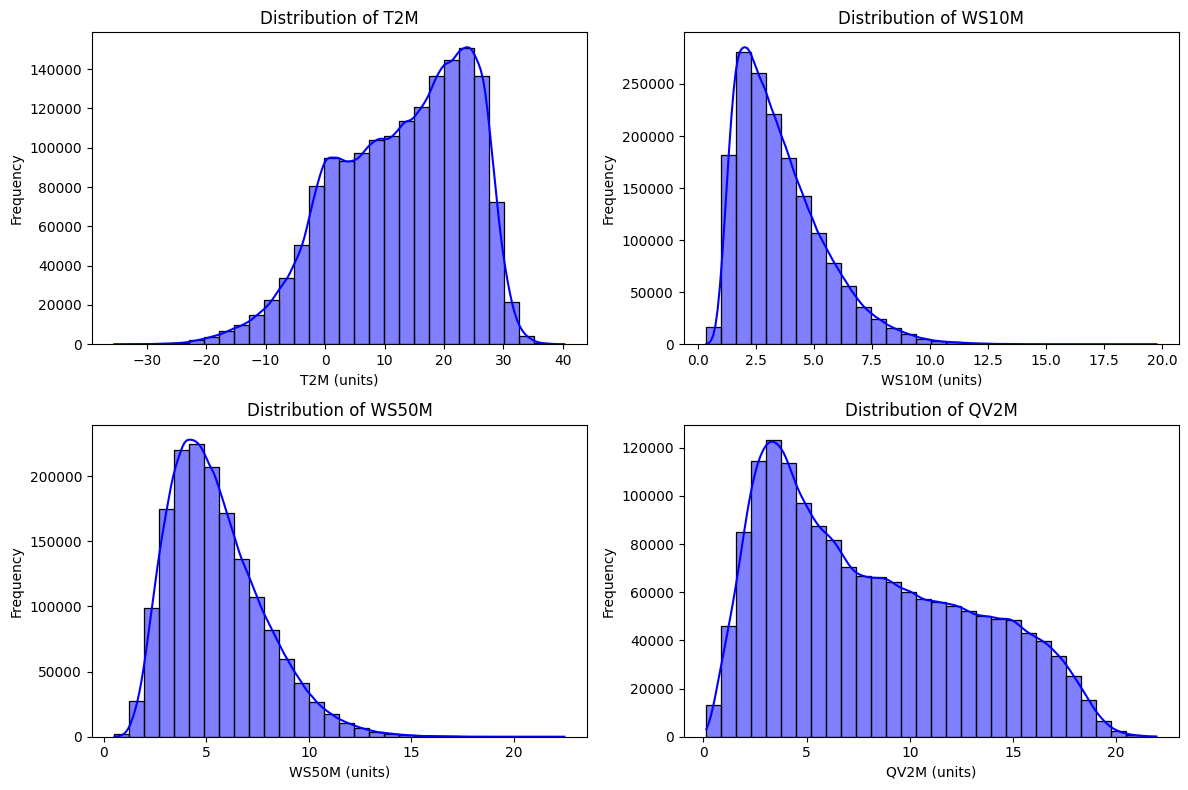

In [ ]:
# Create histogram plots to explore the distribution of key meteorological variables

# Select relevant numerical meteorological columns for visualization
columns_to_plot = ["T2M", "WS10M", "WS50M", "QV2M"]

# Set up the figure size for the 2x2 subplot layout
plt.figure(figsize=(12, 8))

# Loop through each selected column to create individual histograms
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # Create subplot
    sns.histplot(meteo[col], bins=30, kde=True, color="blue")  # Histogram with KDE
    plt.title(f"Distribution of {col}", fontsize=12)  # Add title
    plt.xlabel(f"{col} (units)", fontsize=10)  # X-axis label with units placeholder
    plt.ylabel("Frequency", fontsize=10)  # Y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

This figure presents the distribution of four key meteorological variables: T2M (Temperature at 2m), WS10M (Wind Speed at 10m), WS50M (Wind Speed at 50m), and QV2M (Specific Humidity at 2m). The histograms illustrate the frequency of different values for each variable, with kernel density estimation (KDE) overlaid to show the underlying distribution. T2M follows a near-normal distribution, while WS10M and WS50M exhibit right-skewed distributions, indicating that most wind speeds are low with occasional high values. QV2M also follows a right-skewed pattern, showing that most specific humidity values are low but with some extreme values. These insights help in understanding the variability of meteorological factors influencing drought conditions. The smooth line in each plot is a Kernel Density Estimate (KDE) curve. It shows the smoothed distribution of the data, helping us understand the shape beyond the histogram bars. We used default KDE settings (Gaussian kernel, auto bandwidth) to visualize trends like skewness or peaks more clearly.

In [ ]:
# Rename columns in the drought dataset to match those in the meteorological dataset for merging.

# Rename 'MapDate' to 'date' to align with the formatted 'date' column in the meteorological data
drought_data = drought_data.rename(columns={'MapDate': 'date'})

# Rename 'FIPS' to 'fips' to ensure column name consistency with the meteorological dataset
drought_data = drought_data.rename(columns={'FIPS': 'fips'})

#Sort the drought dataset by 'fips' and 'date' in ascending order.
drought_data= drought_data.sort_values(by=['fips', 'date'], ascending=[True, True])

drought_data

,date,fips,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
30,20110104,1001,Autauga County,AL,54.61,45.39,0.51,0.00,0.0,0.0,2011-01-04,2011-01-10,1
3251,20110111,1001,Autauga County,AL,54.61,45.39,0.51,0.00,0.0,0.0,2011-01-11,2011-01-17,1
6472,20110118,1001,Autauga County,AL,0.00,100.00,1.21,0.00,0.0,0.0,2011-01-18,2011-01-24,1
9693,20110125,1001,Autauga County,AL,0.00,100.00,1.21,0.00,0.0,0.0,2011-01-25,2011-01-31,1
12914,20110201,1001,Autauga County,AL,0.00,100.00,1.21,0.00,0.0,0.0,2011-02-01,2011-02-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668476,20201201,56043,Washakie County,WY,0.00,100.00,100.00,84.98,66.1,0.0,2020-12-01,2020-12-07,1
1671697,20201208,56043,Washakie County,WY,0.00,100.00,100.00,84.98,66.1,0.0,2020-12-08,2020-12-14,1
1674918,20201215,56043,Washakie County,WY,0.00,100.00,100.00,85.71,66.1,0.0,2020-12-15,2020-12-21,1
1678139,20201222,56043,Washakie County,WY,0.00,100.00,100.00,85.71,66.1,0.0,2020-12-22,2020-12-28,1


In [ ]:
print(drought_data.describe())

               date          fips          None            D0            D1  \
count  1.621854e+06  1.621854e+06  1.621854e+06  1.621854e+06  1.621854e+06   
mean   2.015569e+07  3.066367e+04  6.403255e+01  3.596745e+01  2.001505e+01   
std    2.873193e+04  1.497685e+04  4.581678e+01  4.581678e+01  3.820676e+01   
min    2.011010e+07  1.001000e+03  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.013070e+07  1.904300e+04  0.000000e+00  0.000000e+00  0.000000e+00   
50%    2.015567e+07  2.921100e+04  1.000000e+02  0.000000e+00  0.000000e+00   
75%    2.018070e+07  4.600700e+04  1.000000e+02  1.000000e+02  1.010000e+00   
max    2.020123e+07  5.604300e+04  1.000000e+02  1.000000e+02  1.000000e+02   

                 D2            D3            D4  StatisticFormatID  
count  1.621854e+06  1.621854e+06  1.621854e+06          1621854.0  
mean   1.068488e+01  5.086061e+00  1.672897e+00                1.0  
std    2.937931e+01  2.070552e+01  1.188206e+01                0.0  
min    0.000

In [ ]:
# Save the cleaned meteorological and drought datasets to CSV files for backup or future use
meteo.to_csv("/content/drive/MyDrive/MLPPproj/meteo_clean.csv", index=False)
drought_data.to_csv("/content/drive/MyDrive/MLPPproj/drought_data_clean.csv", index=False)

# Merge the drought and meteorological datasets side-by-side (column-wise) after resetting their indices
# This assumes both datasets are sorted and aligned by 'fips' and 'date' for a correct one-to-one row merge
merged_df = pd.concat([drought_data.reset_index(drop=True), meteo.reset_index(drop=True)], axis=1)
merged_df.to_csv("/content/drive/MyDrive/MLPPproj/final_data_set.csv", index=False)
merged_df = pd.read_csv("/content/drive/MyDrive/MLPPproj/final_data_set.csv")
merged_df

,date,fips,County,State,None,D0,D1,D2,D3,D4,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,date.1
0,20110104,1001,Autauga County,AL,54.61,45.39,0.51,0.00,0.0,0.0,...,1.64,2.30,0.72,1.58,2.51,3.74,1.22,2.52,0.4590,20110104
1,20110111,1001,Autauga County,AL,54.61,45.39,0.51,0.00,0.0,0.0,...,2.40,4.27,0.20,4.07,4.43,7.10,0.33,6.77,0.4590,20110111
2,20110118,1001,Autauga County,AL,0.00,100.00,1.21,0.00,0.0,0.0,...,1.70,2.01,1.05,0.96,3.12,4.78,1.88,2.90,1.0121,20110118
3,20110125,1001,Autauga County,AL,0.00,100.00,1.21,0.00,0.0,0.0,...,2.06,4.09,0.36,3.73,3.76,6.17,0.67,5.50,1.0121,20110125
4,20110201,1001,Autauga County,AL,0.00,100.00,1.21,0.00,0.0,0.0,...,4.06,5.71,2.15,3.56,7.14,10.17,4.57,5.60,1.0121,20110201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621849,20201201,56043,Washakie County,WY,0.00,100.00,100.00,84.98,66.1,0.0,...,5.42,8.52,2.85,5.68,7.81,10.34,5.13,5.21,3.5109,20201201
1621850,20201208,56043,Washakie County,WY,0.00,100.00,100.00,84.98,66.1,0.0,...,3.05,3.85,2.36,1.49,4.73,6.30,3.85,2.45,3.5109,20201208
1621851,20201215,56043,Washakie County,WY,0.00,100.00,100.00,85.71,66.1,0.0,...,2.88,3.90,1.68,2.21,4.39,6.50,2.83,3.66,3.5182,20201215
1621852,20201222,56043,Washakie County,WY,0.00,100.00,100.00,85.71,66.1,0.0,...,8.83,13.78,6.64,7.14,11.90,17.31,9.05,8.25,3.5182,20201222


In [ ]:
print(merged_df.describe())

               date          fips          None            D0            D1  \
count  1.621854e+06  1.621854e+06  1.621854e+06  1.621854e+06  1.621854e+06   
mean   2.015569e+07  3.066367e+04  6.403255e+01  3.596745e+01  2.001505e+01   
std    2.873193e+04  1.497685e+04  4.581678e+01  4.581678e+01  3.820676e+01   
min    2.011010e+07  1.001000e+03  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.013070e+07  1.904300e+04  0.000000e+00  0.000000e+00  0.000000e+00   
50%    2.015567e+07  2.921100e+04  1.000000e+02  0.000000e+00  0.000000e+00   
75%    2.018070e+07  4.600700e+04  1.000000e+02  1.000000e+02  1.010000e+00   
max    2.020123e+07  5.604300e+04  1.000000e+02  1.000000e+02  1.000000e+02   

                 D2            D3            D4  StatisticFormatID  \
count  1.621854e+06  1.621854e+06  1.621854e+06          1621854.0   
mean   1.068488e+01  5.086061e+00  1.672897e+00                1.0   
std    2.937931e+01  2.070552e+01  1.188206e+01                0.0   
min    0

In [ ]:
merged_df.shape

(1621854, 35)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621854 entries, 0 to 1621853
Data columns (total 35 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   date               1621854 non-null  int64  
 1   fips               1621854 non-null  int64  
 2   County             1621854 non-null  object 
 3   State              1621854 non-null  object 
 4   None               1621854 non-null  float64
 5   D0                 1621854 non-null  float64
 6   D1                 1621854 non-null  float64
 7   D2                 1621854 non-null  float64
 8   D3                 1621854 non-null  float64
 9   D4                 1621854 non-null  float64
 10  ValidStart         1621854 non-null  object 
 11  ValidEnd           1621854 non-null  object 
 12  StatisticFormatID  1621854 non-null  int64  
 13  fips.1             1621854 non-null  int64  
 14  date3              1621854 non-null  object 
 15  PRECTOT            1621854 non-n

In [ ]:
merged_df.isnull().sum()

,0
date,0
fips,0
County,0
State,0
None,0
D0,0
D1,0
D2,0
D3,0
D4,0


In [ ]:
merged_df.duplicated().sum()

np.int64(0)

In [ ]:
# Filter rows where the state abbreviation is 'CA' for California
merged_df_ca = merged_df[merged_df['State'] == 'CA'].reset_index(drop=True)

In [ ]:
merged_df_ca

,date,fips,County,State,None,D0,D1,D2,D3,D4,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,date.1
0,20110104,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.00,0.0,...,1.79,2.76,0.89,1.87,2.61,4.76,1.34,3.42,0.0000,20110104
1,20110111,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.00,0.0,...,2.60,3.73,1.73,2.00,4.49,6.18,3.06,3.13,0.0000,20110111
2,20110118,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.00,0.0,...,2.80,3.99,2.13,1.86,4.11,5.54,2.54,3.00,0.0000,20110118
3,20110125,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.00,0.0,...,2.08,3.19,0.49,2.71,2.96,4.34,0.71,3.63,0.0000,20110125
4,20110201,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.00,0.0,...,3.53,5.56,1.72,3.84,5.72,9.46,2.54,6.93,0.0000,20110201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30271,20201201,6115,Yuba County,CA,0.0,100.0,100.0,100.0,27.44,0.0,...,2.80,4.75,0.14,4.61,4.77,7.98,0.55,7.43,3.2744,20201201
30272,20201208,6115,Yuba County,CA,0.0,100.0,100.0,100.0,27.44,0.0,...,3.09,5.07,0.54,4.52,5.10,8.42,0.76,7.66,3.2744,20201208
30273,20201215,6115,Yuba County,CA,0.0,100.0,100.0,100.0,27.44,0.0,...,2.37,3.82,0.53,3.29,3.98,7.07,0.67,6.40,3.2744,20201215
30274,20201222,6115,Yuba County,CA,0.0,100.0,100.0,100.0,27.44,0.0,...,2.50,4.15,1.00,3.15,4.29,7.48,1.47,6.01,3.2744,20201222


In [ ]:
fips_ca_list = merged_df_ca['fips'].unique()

In [ ]:
fips_ca_df = pd.DataFrame(fips_ca_list, columns=["FIPS"])
fips_ca_df.to_csv("/content/drive/MyDrive/MLPPproj/project/unique_fips_ca.csv", index=False)

In [ ]:
# Step 1: Load your unique FIPS list
fips_ca_df = pd.read_csv("/content/drive/MyDrive/MLPPproj/project/unique_fips_ca.csv")
fips_ca_df['FIPS'] = fips_ca_df['FIPS'].astype(str).str.zfill(5)  # ensure FIPS is 5-digit string

# Step 2: Load the TIGER/Line county shapefile (2024)
# Make sure all the shapefile components (.shp, .dbf, .shx, etc.) are in the same folder
shapefile_path = "/content/drive/MyDrive/MLPPproj/tl_2024_us_county/tl_2024_us_county.shp"  # replace with your actual path
gdf = gpd.read_file(shapefile_path, ignore_geometry=True)  # we only want attributes

# Step 3: Extract necessary columns (GEOID = FIPS, INTPTLAT = latitude, INTPTLON = longitude)
gdf['FIPS'] = gdf['GEOID'].astype(str)
centroid_data_ca = gdf[['FIPS', 'INTPTLAT', 'INTPTLON']]

# Step 4: Merge your FIPS list with centroid data
merged_fips_ca = fips_ca_df.merge(centroid_data_ca, on='FIPS', how='left')

# Step 5: Clean and save
merged_fips_ca = merged_fips_ca.rename(columns={"INTPTLAT": "Latitude", "INTPTLON": "Longitude"})
merged_fips_ca.to_csv("/content/drive/MyDrive/MLPPproj/projectfinal/fips_with_centroids_ca.csv", index=False)

print("✅ FIPS centroid mapping saved to fips_with_centroids.csv")

✅ FIPS centroid mapping saved to fips_with_centroids.csv


In [ ]:
merged_fips_ca

,FIPS,Latitude,Longitude
0,06001,+37.6471385,-121.9124880
1,06003,+38.6217831,-119.7983522
2,06005,+38.4435493,-120.6538580
3,06007,+39.6653362,-121.6032086
4,06009,+38.1910682,-120.5541065
5,06011,+39.1777385,-122.2375629
6,06013,+37.9194790,-121.9515431
7,06015,+41.7499033,-123.9809983
8,06017,+38.7856116,-120.5342245
9,06019,+36.7610058,-119.6550193


### Extracting Validation data from nasa website commenting all code , I saved files in drive

In [ ]:
# # === Load FIPS and weekly dates ===
# fips_df = pd.read_csv("/content/drive/MyDrive/MLPPproj/project/fips_with_centroids_ca.csv")  # Make sure this file is in your working directory

# # === Use only 2021 weekly dates ===
# weekly_dates = pd.date_range(start="2021-01-05", end="2021-12-28", freq="7D")

# # === NASA POWER parameters ===
# parameters = (
#     "T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,"
#     "QV2M,PRECTOT,PS,"
#     "WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,"
#     "WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE"
# )

# # === Generate all (FIPS, date) tasks ===
# tasks = []
# for _, row in fips_df.iterrows():
#     fips = str(row['FIPS']).zfill(5)
#     lat = row['Latitude']
#     lon = row['Longitude']
#     for date in weekly_dates:
#         tasks.append((fips, lat, lon, date))

# # === Function to fetch one week's data for one FIPS ===
# def fetch_nasa_data(task):
#     fips, lat, lon, date = task
#     date_str = date.strftime('%Y%m%d')
#     url = (
#         f"https://power.larc.nasa.gov/api/temporal/daily/point?"
#         f"parameters={parameters}&community=AG&latitude={lat}&longitude={lon}"
#         f"&start={date_str}&end={date_str}&format=JSON"
#     )
#     headers = {"User-Agent": "MLPP-DroughtModel/1.0 (student@university.edu)"}

#     for attempt in range(3):  # retry logic
#         try:
#             response = requests.get(url, headers=headers, timeout=30)
#             response.raise_for_status()
#             data = response.json()
#             daily_data = data['properties']['parameter']
#             record = {
#                 "FIPS": fips,
#                 "date": date.strftime('%Y-%m-%d'),
#                 "Latitude": lat,
#                 "Longitude": lon
#             }
#             for param, values in daily_data.items():
#                 record[param] = list(values.values())[0]
#             return record
#         except Exception as e:
#             if attempt < 2:
#                 time.sleep(2)  # retry delay
#             else:
#                 return {"FIPS": fips, "date": date.strftime('%Y-%m-%d'), "error": str(e)}

# # === Run with 5 threads ===
# results = []
# with ThreadPoolExecutor(max_workers=5) as executor:
#     futures = {executor.submit(fetch_nasa_data, task): task for task in tasks}
#     for future in tqdm(as_completed(futures), total=len(futures), desc="Fetching 2021 weather data"):
#         result = future.result()
#         if result:
#             results.append(result)

# # === Save results to CSV ===
# df = pd.DataFrame(results)
# df.to_csv("/content/drive/MyDrive/MLPPproj/project/weekly_weather_CA_2021_threaded.csv", index=False)
# print("✅ Done! Saved to 'weekly_weather_CA_2021_threaded.csv'")

In [ ]:
meteo2021 = pd.read_csv("/content/drive/MyDrive/MLPPproj/project/weekly_weather_CA_2021_threaded.csv")

In [ ]:
# # === Step 1: Load FIPS for California ===
# fips_df = pd.read_csv("/content/drive/MyDrive/MLPPproj/project/fips_with_centroids_ca.csv")

# # === Step 2: Define weekly dates for 2022 and 2023 ===
# weekly_dates = pd.date_range(start="2022-01-04", end="2023-12-26", freq="7D")

# # === Step 3: NASA POWER parameters ===
# parameters = (
#     "T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,"
#     "QV2M,PRECTOT,PS,"
#     "WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,"
#     "WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE"
# )

# # === Step 4: Prepare (fips, date) tasks ===
# tasks = []
# for _, row in fips_df.iterrows():
#     fips = str(row['FIPS']).zfill(5)
#     lat = row['Latitude']
#     lon = row['Longitude']
#     for date in weekly_dates:
#         tasks.append((fips, lat, lon, date))

# # === Step 5: Define API call function with retries ===
# def fetch_nasa_data(task):
#     fips, lat, lon, date = task
#     date_str = date.strftime('%Y%m%d')
#     url = (
#         f"https://power.larc.nasa.gov/api/temporal/daily/point?"
#         f"parameters={parameters}&community=AG&latitude={lat}&longitude={lon}"
#         f"&start={date_str}&end={date_str}&format=JSON"
#     )
#     for attempt in range(3):
#         try:
#             response = requests.get(url, timeout=30)
#             response.raise_for_status()
#             data = response.json()
#             daily_data = data['properties']['parameter']
#             record = {
#                 "FIPS": fips,
#                 "date": date.strftime('%Y-%m-%d'),
#                 "Latitude": lat,
#                 "Longitude": lon
#             }
#             for param, values in daily_data.items():
#                 record[param] = list(values.values())[0]
#             return record
#         except:
#             time.sleep(2)
#     return {"FIPS": fips, "date": date.strftime('%Y-%m-%d'), "error": "Failed"}

# # === Step 6: Threaded execution with progress bar ===
# results = []
# with ThreadPoolExecutor(max_workers=5) as executor:
#     futures = {executor.submit(fetch_nasa_data, task): task for task in tasks}
#     for future in tqdm(as_completed(futures), total=len(futures), desc="Fetching 2022–2023 weather data"):
#         results.append(future.result())

# # === Step 7: Save the data ===
# df = pd.DataFrame(results)
# df.to_csv("/content/drive/MyDrive/MLPPproj/project/weekly_weather_CA_2022_2023.csv", index=False)
# print("✅ Saved: weekly_weather_CA_2022_2023.csv")

In [ ]:
meteo2223= pd.read_csv("/content/drive/MyDrive/MLPPproj/project/weekly_weather_CA_2022_2023.csv")

In [ ]:
# meteo2223

In [ ]:
# def fetch_weekly_weather(start_date, end_date, fips_path, output_csv_path):
#     # === Step 1: Load FIPS CSV ===
#     fips_df = pd.read_csv(fips_path)

#     # === Step 2: Define weekly date range ===
#     weekly_dates = pd.date_range(start=start_date, end=end_date, freq="7D")

#     # === Step 3: NASA POWER parameters ===
#     parameters = (
#         "T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,"
#         "QV2M,PRECTOT,PS,"
#         "WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,"
#         "WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE"
#     )

#     # === Step 4: Create (fips, lat, lon, date) tasks ===
#     tasks = []
#     for _, row in fips_df.iterrows():
#         fips = str(row['FIPS']).zfill(5)
#         lat = row['Latitude']
#         lon = row['Longitude']
#         for date in weekly_dates:
#             tasks.append((fips, lat, lon, date))

#     # === Step 5: API fetch logic ===
#     def fetch_nasa_data(task):
#         fips, lat, lon, date = task
#         date_str = date.strftime('%Y%m%d')
#         url = (
#             f"https://power.larc.nasa.gov/api/temporal/daily/point?"
#             f"parameters={parameters}&community=AG&latitude={lat}&longitude={lon}"
#             f"&start={date_str}&end={date_str}&format=JSON"
#         )
#         for attempt in range(3):
#             try:
#                 response = requests.get(url, timeout=30)
#                 response.raise_for_status()
#                 data = response.json()
#                 daily_data = data['properties']['parameter']
#                 record = {
#                     "FIPS": fips,
#                     "date": date.strftime('%Y-%m-%d'),
#                     "Latitude": lat,
#                     "Longitude": lon
#                 }
#                 for param, values in daily_data.items():
#                     record[param] = list(values.values())[0]
#                 return record
#             except:
#                 time.sleep(2)
#         return {"FIPS": fips, "date": date.strftime('%Y-%m-%d'), "error": "Failed"}

#     # === Step 6: Run tasks in parallel ===
#     results = []
#     with ThreadPoolExecutor(max_workers=5) as executor:
#         futures = {executor.submit(fetch_nasa_data, task): task for task in tasks}
#         for future in tqdm(as_completed(futures), total=len(futures), desc=f"Fetching weather data: {start_date} to {end_date}"):
#             results.append(future.result())

#     # === Step 7: Save the results ===
#     df = pd.DataFrame(results)
#     df.to_csv(output_csv_path, index=False)
#     print(f"✅ Saved: {output_csv_path}")

In [ ]:
# fetch_weekly_weather(
#     start_date="2024-01-02",
#     end_date="2025-05-06",
#     fips_path="/content/drive/MyDrive/MLPPproj/project/fips_with_centroids_ca.csv",
#     output_csv_path="/content/drive/MyDrive/MLPPproj/project/weekly_weather_CA_2024_2025.csv"
# )

We used NASA POWER API to fetch weekly weather data (e.g., temperature, precipitation, wind) for California counties based on FIPS centroids. The script iterated over each county and weekly date, pulled weather parameters, and saved the structured dataset as a CSV for validation (2024–2025).

In [ ]:
meteo2425 = pd.read_csv("/content/drive/MyDrive/MLPPproj/project/weekly_weather_CA_2024_2025.csv")

In [ ]:
# meteo2425

In [ ]:
meteo2021_to_present = pd.concat([meteo2021, meteo2223, meteo2425], ignore_index=True)

In [ ]:
meteo2021_to_present['FIPS'] = meteo2021_to_present['FIPS'].astype(int)

In [ ]:
# meteo2021_to_present

In [ ]:
meteo_validation_df = meteo2021_to_present.drop(columns=['Latitude', 'Longitude'])

In [ ]:
meteo_validation_df #this is meteorogical data extracted and cleaned 2021-2025 for CA

,FIPS,date,PS,WS50M_MAX,T2M_MIN,WS10M_MAX,WS10M,WS50M_RANGE,T2M_MAX,WS50M_MIN,QV2M,T2MDEW,WS50M,T2MWET,T2M_RANGE,T2M,WS10M_MIN,TS,WS10M_RANGE,PRECTOTCORR
0,6001,2021-01-26,98.30,18.89,0.29,13.97,5.82,16.23,9.07,2.66,4.66,2.52,8.03,3.62,8.78,4.72,1.80,4.39,12.17,14.10
1,6001,2021-01-12,99.72,3.41,7.44,2.05,1.25,2.77,17.34,0.64,6.32,7.07,1.74,9.22,9.90,11.38,0.50,9.74,1.55,0.01
2,6001,2021-01-05,99.54,3.63,5.21,2.27,1.48,3.09,13.95,0.54,5.95,6.19,2.06,7.16,8.74,8.12,0.39,7.86,1.88,0.22
3,6001,2021-02-02,99.14,7.87,5.16,4.70,3.08,5.16,15.39,2.71,7.18,8.82,4.99,9.78,10.23,10.73,1.82,10.78,2.88,8.61
4,6001,2021-01-19,98.63,12.78,4.94,9.88,6.61,8.21,17.65,4.57,3.25,-2.51,9.47,3.49,12.71,9.49,2.78,8.93,7.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13161,6115,2025-03-25,93.30,7.86,9.98,3.61,2.22,7.34,23.89,0.52,8.56,10.30,3.88,13.83,13.91,17.35,0.37,15.47,3.24,0.00
13162,6115,2025-04-15,92.53,3.04,13.06,2.64,1.55,1.90,21.44,1.14,7.99,9.32,2.22,12.88,8.38,16.44,0.59,15.19,2.05,0.32
13163,6115,2025-04-22,92.31,3.80,11.15,2.50,1.88,2.13,21.42,1.67,7.87,9.12,2.97,12.46,10.27,15.79,1.16,14.56,1.34,0.32
13164,6115,2025-04-29,92.82,2.81,11.45,2.25,1.39,2.14,21.91,0.67,7.88,9.01,1.90,12.86,10.46,16.72,0.42,15.09,1.83,1.77


In [ ]:
# # --- Step 1: Set start date and generate weekly dates until today
# start_date = datetime.datetime(2021, 1, 5)
# end_date = datetime.datetime.today()
# interval = datetime.timedelta(days=7)

# # Generate weekly dates
# dates = []
# current = start_date
# while current <= end_date:
#     dates.append(current)
#     current += interval

# # --- Step 2: Generate file URLs
# base_url = "https://droughtmonitor.unl.edu/DmData/GISData.aspx?mode=table&aoi=county&date="
# urls = [base_url + date.strftime("%Y-%m-%d") for date in dates]

# # --- Step 3: Download and read data
# all_data = []

# for i, url in enumerate(urls):
#     try:
#         print(f"📥 Reading data for {dates[i].strftime('%Y-%m-%d')}...")
#         df = pd.read_csv(url)
#         df["date"] = dates[i].strftime('%Y-%m-%d')  # add date column
#         all_data.append(df)
#     except Exception as e:
#         print(f"⚠️ Failed to read {url}: {e}")

# # --- Step 4: Combine all weekly data into one DataFrame
# if all_data:
#     drought_df = pd.concat(all_data, ignore_index=True)
#     drought_df.to_csv("/content/drive/MyDrive/MLPPproj/project/weekly_drought_data_2021_to_present.csv", index=False)
#     print("✅ Drought data saved to 'weekly_drought_data_2021_to_present.csv'")
# else:
#     print("❌ No data was successfully downloaded.")

In [ ]:
drought_2021_to_present = pd.read_csv("/content/drive/MyDrive/MLPPproj/project/weekly_drought_data_2021_to_present.csv")

In [ ]:
drought_2021_to_present

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,date
0,20210105,2013,Aleutians East Borough,AK,100.00,0.00,0.00,0.00,0.0,0.0,2021-01-05,2021-01-11,1,2021-01-05
1,20210105,2016,Aleutians West Census Area,AK,98.98,1.02,0.00,0.00,0.0,0.0,2021-01-05,2021-01-11,1,2021-01-05
2,20210105,2020,Anchorage Municipality,AK,100.00,0.00,0.00,0.00,0.0,0.0,2021-01-05,2021-01-11,1,2021-01-05
3,20210105,2050,Bethel Census Area,AK,100.00,0.00,0.00,0.00,0.0,0.0,2021-01-05,2021-01-11,1,2021-01-05
4,20210105,2060,Bristol Bay Borough,AK,100.00,0.00,0.00,0.00,0.0,0.0,2021-01-05,2021-01-11,1,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731162,20250506,56037,Sweetwater County,WY,86.27,13.73,0.00,0.00,0.0,0.0,2025-05-06,2025-05-12,1,2025-05-06
731163,20250506,56039,Teton County,WY,0.00,100.00,99.31,35.99,0.0,0.0,2025-05-06,2025-05-12,1,2025-05-06
731164,20250506,56041,Uinta County,WY,90.34,9.66,0.00,0.00,0.0,0.0,2025-05-06,2025-05-12,1,2025-05-06
731165,20250506,56043,Washakie County,WY,37.79,62.21,8.09,0.00,0.0,0.0,2025-05-06,2025-05-12,1,2025-05-06


In [ ]:
# Keep only rows where State is 'CA'
drought_2021_to_present_ca = drought_2021_to_present[drought_2021_to_present['State'] == 'CA']

In [ ]:
drought_validation_df = drought_2021_to_present[['FIPS', 'date', 'D0', 'D1', 'D2', 'D3', 'D4']]

In [ ]:
drought_validation_df #this is drought validation data extracted and cleaned 2021-2025 FOR CA

,FIPS,date,D0,D1,D2,D3,D4
0,2013,2021-01-05,0.00,0.00,0.00,0.0,0.0
1,2016,2021-01-05,1.02,0.00,0.00,0.0,0.0
2,2020,2021-01-05,0.00,0.00,0.00,0.0,0.0
3,2050,2021-01-05,0.00,0.00,0.00,0.0,0.0
4,2060,2021-01-05,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...
731162,56037,2025-05-06,13.73,0.00,0.00,0.0,0.0
731163,56039,2025-05-06,100.00,99.31,35.99,0.0,0.0
731164,56041,2025-05-06,9.66,0.00,0.00,0.0,0.0
731165,56043,2025-05-06,62.21,8.09,0.00,0.0,0.0


commented this snippet as the file is in saved drive

In [ ]:
validation_df = pd.merge(drought_validation_df, meteo_validation_df, on=['FIPS', 'date'], how='inner')

In [ ]:
# validation_df.to_csv("/content/drive/MyDrive/MLPPproj/project/validation_df.csv", index=False)

In [ ]:
validation_df = pd.read_csv("/content/drive/MyDrive/MLPPproj/project/validation_df.csv")

In [ ]:
validation_df #this is final merged validation dtaa 2021-2025 for CA

,FIPS,date,D0,D1,D2,D3,D4,PS,WS50M_MAX,T2M_MIN,...,QV2M,T2MDEW,WS50M,T2MWET,T2M_RANGE,T2M,WS10M_MIN,TS,WS10M_RANGE,PRECTOTCORR
0,6001,2021-01-05,100.00,100.00,100.00,0.00,0.0,99.54,3.63,5.21,...,5.95,6.19,2.06,7.16,8.74,8.12,0.39,7.86,1.88,0.22
1,6003,2021-01-05,100.00,100.00,100.00,0.00,0.0,80.74,4.65,-6.28,...,2.41,-8.99,2.46,-4.68,13.28,-0.37,0.27,-2.80,2.30,0.00
2,6005,2021-01-05,100.00,100.00,100.00,0.00,0.0,92.03,5.88,-0.52,...,3.62,-2.13,3.02,1.59,12.93,5.31,0.58,3.67,2.09,0.01
3,6007,2021-01-05,100.00,100.00,100.00,66.33,0.0,101.05,3.63,4.43,...,5.24,4.56,2.64,6.70,10.91,8.85,1.37,7.42,0.64,0.03
4,6009,2021-01-05,100.00,100.00,100.00,0.00,0.0,96.71,4.95,3.10,...,4.16,0.29,2.12,3.89,10.94,7.48,0.13,5.64,2.46,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13161,6107,2025-05-06,100.00,20.98,0.00,0.00,0.0,88.12,4.02,9.46,...,7.35,7.50,1.66,10.89,9.20,14.28,0.27,13.59,3.51,0.16
13162,6109,2025-05-06,14.16,0.00,0.00,0.00,0.0,84.58,2.78,6.61,...,5.01,1.16,1.85,6.74,11.87,12.33,0.09,10.96,2.17,0.00
13163,6111,2025-05-06,100.00,100.00,95.81,0.00,0.0,93.93,3.33,10.34,...,8.22,10.09,1.84,11.91,9.04,13.72,0.76,14.62,2.18,0.52
13164,6113,2025-05-06,0.00,0.00,0.00,0.00,0.0,100.41,7.38,12.74,...,7.21,9.07,5.32,14.59,15.78,20.12,2.09,20.27,3.29,0.00


---

### **IV. Methods and Results**

---

In [ ]:
merged_df #2011-2020 data previously saved in drive which is merged drought and meteo data

,date,fips,County,State,None,D0,D1,D2,D3,D4,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,date.1
0,20110104,1001,Autauga County,AL,54.61,45.39,0.51,0.00,0.0,0.0,...,1.64,2.30,0.72,1.58,2.51,3.74,1.22,2.52,0.4590,20110104
1,20110111,1001,Autauga County,AL,54.61,45.39,0.51,0.00,0.0,0.0,...,2.40,4.27,0.20,4.07,4.43,7.10,0.33,6.77,0.4590,20110111
2,20110118,1001,Autauga County,AL,0.00,100.00,1.21,0.00,0.0,0.0,...,1.70,2.01,1.05,0.96,3.12,4.78,1.88,2.90,1.0121,20110118
3,20110125,1001,Autauga County,AL,0.00,100.00,1.21,0.00,0.0,0.0,...,2.06,4.09,0.36,3.73,3.76,6.17,0.67,5.50,1.0121,20110125
4,20110201,1001,Autauga County,AL,0.00,100.00,1.21,0.00,0.0,0.0,...,4.06,5.71,2.15,3.56,7.14,10.17,4.57,5.60,1.0121,20110201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621849,20201201,56043,Washakie County,WY,0.00,100.00,100.00,84.98,66.1,0.0,...,5.42,8.52,2.85,5.68,7.81,10.34,5.13,5.21,3.5109,20201201
1621850,20201208,56043,Washakie County,WY,0.00,100.00,100.00,84.98,66.1,0.0,...,3.05,3.85,2.36,1.49,4.73,6.30,3.85,2.45,3.5109,20201208
1621851,20201215,56043,Washakie County,WY,0.00,100.00,100.00,85.71,66.1,0.0,...,2.88,3.90,1.68,2.21,4.39,6.50,2.83,3.66,3.5182,20201215
1621852,20201222,56043,Washakie County,WY,0.00,100.00,100.00,85.71,66.1,0.0,...,8.83,13.78,6.64,7.14,11.90,17.31,9.05,8.25,3.5182,20201222


We are using this merged_df to start our modeling

In [ ]:
drop_cols = [
    'None',                  # Redundant: percentage of area with no drought — not needed if predicting drought levels
    'score',                 # Possibly a derived or unclear metric, not used in modeling
    'County', 'State',       # Location labels — not useful as numeric features
    'ValidStart', 'ValidEnd',# Metadata dates defining drought period — not used directly for prediction
    'StatisticFormatID',     # Irrelevant metadata
    'fips.1',                # Duplicate of 'fips' column
    'date.1', 'date3'        # Duplicated or transformed versions of the 'date' column
]

In [ ]:
# Drop unnecessary columns listed in drop_cols only if they exist in the DataFrame
# This ensures the code won't raise an error if some columns are already missing
merged_df = merged_df.drop(columns=[col for col in drop_cols if col in merged_df.columns])

In [ ]:
# Convert the 'date' column from string format 'YYYYMMDD' to datetime object for easier time-based operations
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y%m%d')

In [ ]:
# Create a binary target variable: 1 if the combined percentage of D3 and D4 drought levels is ≥ 10%, else 0
# This helps simplify the problem into a binary classification: severe drought vs. not
merged_df['drought_binary'] = (merged_df[['D3', 'D4']].sum(axis=1) >= 10).astype(int)

In [ ]:
merged_df

,date,fips,D0,D1,D2,D3,D4,PRECTOT,PS,QV2M,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,drought_binary
0,2011-01-04,1001,45.39,0.51,0.00,0.0,0.0,0.05,100.53,3.67,...,4.16,1.64,2.30,0.72,1.58,2.51,3.74,1.22,2.52,0
1,2011-01-11,1001,45.39,0.51,0.00,0.0,0.0,0.82,101.06,3.29,...,-0.28,2.40,4.27,0.20,4.07,4.43,7.10,0.33,6.77,0
2,2011-01-18,1001,100.00,1.21,0.00,0.0,0.0,4.84,99.61,6.32,...,7.07,1.70,2.01,1.05,0.96,3.12,4.78,1.88,2.90,0
3,2011-01-25,1001,100.00,1.21,0.00,0.0,0.0,11.61,99.81,5.63,...,6.10,2.06,4.09,0.36,3.73,3.76,6.17,0.67,5.50,0
4,2011-02-01,1001,100.00,1.21,0.00,0.0,0.0,35.05,99.73,9.04,...,13.01,4.06,5.71,2.15,3.56,7.14,10.17,4.57,5.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621849,2020-12-01,56043,100.00,100.00,84.98,66.1,0.0,1.24,83.55,2.58,...,-2.74,5.42,8.52,2.85,5.68,7.81,10.34,5.13,5.21,1
1621850,2020-12-08,56043,100.00,100.00,84.98,66.1,0.0,0.00,83.70,2.05,...,-1.57,3.05,3.85,2.36,1.49,4.73,6.30,3.85,2.45,1
1621851,2020-12-15,56043,100.00,100.00,85.71,66.1,0.0,0.14,82.90,2.04,...,-6.81,2.88,3.90,1.68,2.21,4.39,6.50,2.83,3.66,1
1621852,2020-12-22,56043,100.00,100.00,85.71,66.1,0.0,1.64,82.00,3.13,...,-0.82,8.83,13.78,6.64,7.14,11.90,17.31,9.05,8.25,1


<ipython-input-144-1f94793e1e54>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='drought_binary', palette='viridis')


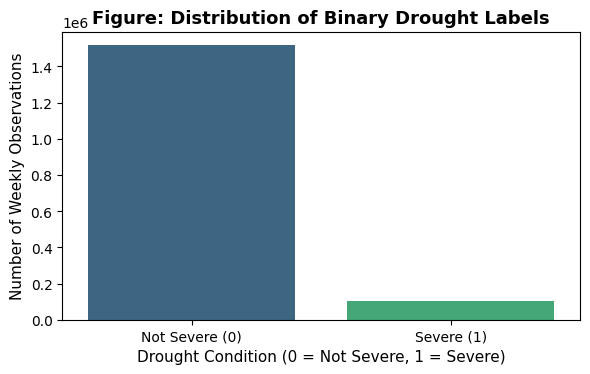

In [ ]:
# 📊 Plot the distribution of the binary drought classification
plt.figure(figsize=(6, 4))

# 🟢 Create a count plot for binary drought labels (0 = Not Severe, 1 = Severe)
sns.countplot(data=merged_df, x='drought_binary', palette='viridis')

# 🏷️ Add title and axis labels with clear descriptions
plt.title("Figure: Distribution of Binary Drought Labels", fontsize=13, weight='bold')
plt.xlabel("Drought Condition (0 = Not Severe, 1 = Severe)", fontsize=11)
plt.ylabel("Number of Weekly Observations", fontsize=11)

# 🧭 Customize x-axis labels for clarity
plt.xticks([0, 1], ['Not Severe (0)', 'Severe (1)'])

# 🎯 Adjust layout to avoid overlap
plt.tight_layout()

# 📈 Show the plot
plt.show()

This plot visualizes the class distribution for the binary drought classification task, where class 0 represents weeks without severe drought and class 1 represents weeks with severe drought conditions (defined as ≥10% area under D3 or D4 drought). As seen, there is a significant class imbalance—severe drought weeks are vastly outnumbered by non-severe ones.

This imbalance is critical to our problem statement, which focuses on accurately identifying severe drought periods for better resource planning. The skewed distribution directly affects classification model performance, especially metrics like recall and precision for the minority class. This observation motivated the use of techniques like scale_pos_weight in XGBoost and evaluation strategies that emphasize recall and ROC AUC over accuracy.

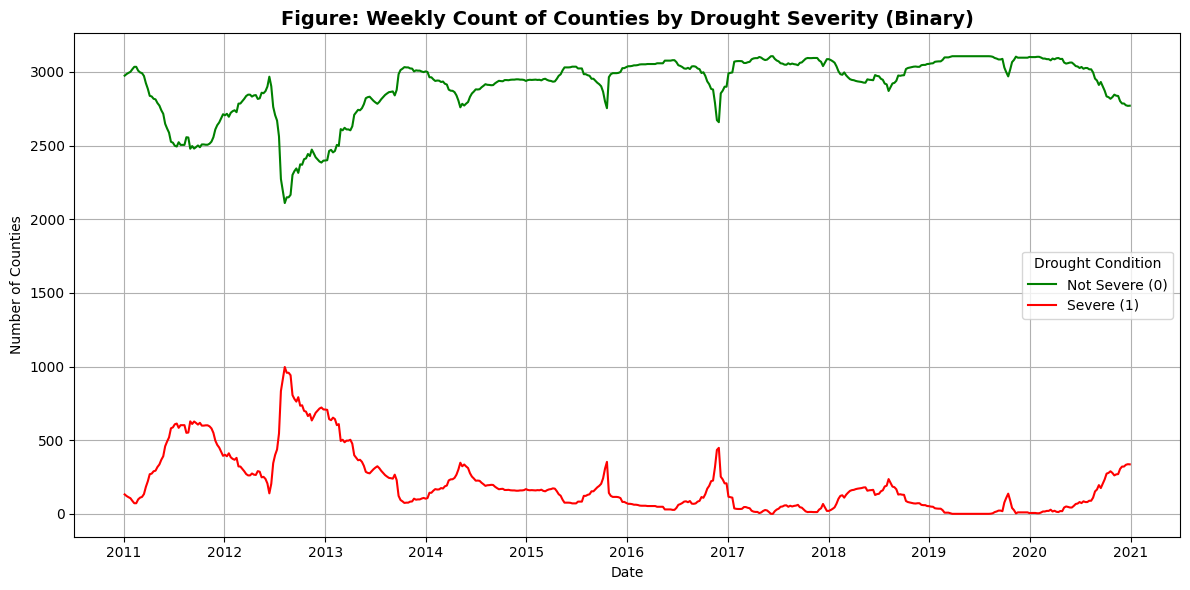

In [ ]:
# Ensure the 'date' column is in datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Group the data by week and drought severity (binary), then count occurrences
weekly_counts = (
    merged_df.groupby(['date', 'drought_binary'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={0: 'Not Severe', 1: 'Severe'})
    .reset_index()
)

# Create a time series line plot of drought condition counts by week
plt.figure(figsize=(12, 6))
plt.plot(weekly_counts['date'], weekly_counts['Not Severe'], label='Not Severe (0)', color='green')
plt.plot(weekly_counts['date'], weekly_counts['Severe'], label='Severe (1)', color='red')
plt.title("Figure: Weekly Count of Counties by Drought Severity (Binary)", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Counties")
plt.legend(title="Drought Condition")
plt.grid(True)
plt.tight_layout()
plt.show()

This time-series line plot shows the weekly number of U.S. counties categorized under severe drought (D3–D4, red line) versus non-severe drought (D0–D2, green line) from 2011 to 2020. The green line indicates that most counties generally experienced non-severe conditions, while the red line highlights clear spikes of severe drought events during specific periods—especially mid-2012, early 2014, and 2016.

This plot is important for understanding the temporal patterns and seasonality in drought conditions across the country. These observed variations helped shape our classification problem to predict “severe drought” weeks and validated our modeling objective of early detection and monitoring.

# Feature Engineering

In [ ]:
# 1. Temperature variation (diurnal swing)
merged_df['temp_diff'] = merged_df['T2M_MAX'] - merged_df['T2M_MIN']

# 2. Humidity approximation (dew point / air temp)
merged_df['humidity_ratio'] = merged_df['T2MDEW'] / (merged_df['T2M'] + 1e-6)

# 3. Wind gust intensity relative to average wind
merged_df['wind_ratio'] = merged_df['WS10M_MAX'] / (merged_df['WS10M'] + 1e-6)

# 4. Moisture balance between rainfall and surface heating (evaporation proxy)
merged_df['precip_evap_balance'] = merged_df['PRECTOT'] - merged_df['TS']

Why These Features Were Created:
	•	temp_diff: Captures daily temperature swings — higher swings often signal dry conditions.
	•	humidity_ratio: Estimates relative humidity — lower values mean drier air.
	•	wind_ratio: Highlights gusty winds — which can accelerate drying.
	•	precip_evap_balance: Shows moisture gain/loss — helps detect drought stress.

These features add physical context to improve drought prediction.

In [ ]:
# Define raw + engineered features
feature_cols = [
    'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
    'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
    'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE',
    'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
    'temp_diff', 'humidity_ratio', 'wind_ratio', 'precip_evap_balance'
]

# Define input (X) and target (y)
X_bin = merged_df[feature_cols]
y_bin = merged_df['drought_binary']

Selected 22 raw and engineered meteorological features as inputs (X_bin) and used binary drought label (y_bin) as the classification target.

In [ ]:
# merged_df.to_csv("/content/drive/MyDrive/MLPPproj/projectfinal/drought_meteo_data2010-2020.csv", index=False)

In [ ]:
merged_df = pd.read_csv("/content/drive/MyDrive/MLPPproj/projectfinal/drought_meteo_data2010-2020.csv")

In [ ]:
merged_df

,date,fips,D0,D1,D2,D3,D4,PRECTOT,PS,QV2M,...,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,drought_binary,temp_diff,humidity_ratio,wind_ratio,precip_evap_balance
0,2011-01-04,1001,45.39,0.51,0.00,0.0,0.0,0.05,100.53,3.67,...,1.58,2.51,3.74,1.22,2.52,0,13.80,-0.093949,1.402438,-4.11
1,2011-01-11,1001,45.39,0.51,0.00,0.0,0.0,0.82,101.06,3.29,...,4.07,4.43,7.10,0.33,6.77,0,8.06,10.722282,1.779166,1.10
2,2011-01-18,1001,100.00,1.21,0.00,0.0,0.0,4.84,99.61,6.32,...,0.96,3.12,4.78,1.88,2.90,0,6.19,0.953552,1.182352,-2.23
3,2011-01-25,1001,100.00,1.21,0.00,0.0,0.0,11.61,99.81,5.63,...,3.73,3.76,6.17,0.67,5.50,0,5.17,0.859903,1.985436,5.51
4,2011-02-01,1001,100.00,1.21,0.00,0.0,0.0,35.05,99.73,9.04,...,3.56,7.14,10.17,4.57,5.60,0,11.36,0.922901,1.406404,22.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621849,2020-12-01,56043,100.00,100.00,84.98,66.1,0.0,1.24,83.55,2.58,...,5.68,7.81,10.34,5.13,5.21,1,7.17,3.132233,1.571955,3.98
1621850,2020-12-08,56043,100.00,100.00,84.98,66.1,0.0,0.00,83.70,2.05,...,1.49,4.73,6.30,3.85,2.45,1,11.35,-8.068176,1.262295,1.57
1621851,2020-12-15,56043,100.00,100.00,85.71,66.1,0.0,0.14,82.90,2.04,...,2.21,4.39,6.50,2.83,3.66,1,8.92,2.050097,1.354166,6.95
1621852,2020-12-22,56043,100.00,100.00,85.71,66.1,0.0,1.64,82.00,3.13,...,7.14,11.90,17.31,9.05,8.25,1,13.92,105.802116,1.560589,2.46


In [ ]:
# Attach date and target
X_bin['date'] = merged_df['date']
X_bin['target'] = y_bin  # drought_binary

<ipython-input-150-cc15757780ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_bin['date'] = merged_df['date']
<ipython-input-150-cc15757780ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_bin['target'] = y_bin  # drought_binary


In [ ]:
train_data = X_bin[X_bin['date'] < '2018-01-01']
test_data = X_bin[X_bin['date'] >= '2018-01-01']

These lines split the dataset into training and testing sets based on date, using data before 2018 for training and data from 2018 onwards for testing.

In [ ]:
train_data

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,temp_diff,humidity_ratio,wind_ratio,precip_evap_balance,date
0,0.05,100.53,3.67,6.28,-0.59,-0.55,13.98,0.18,13.80,4.16,...,1.58,2.51,3.74,1.22,2.52,13.80,-0.093949,1.402438,-4.11,2011-01-04
1,0.82,101.06,3.29,-0.18,-1.93,-1.91,3.10,-4.96,8.06,-0.28,...,4.07,4.43,7.10,0.33,6.77,8.06,10.722282,1.779166,1.10,2011-01-11
2,4.84,99.61,6.32,7.32,6.98,6.98,10.76,4.57,6.20,7.07,...,0.96,3.12,4.78,1.88,2.90,6.19,0.953552,1.182352,-2.23,2011-01-18
3,11.61,99.81,5.63,6.21,5.34,5.34,8.99,3.82,5.17,6.10,...,3.73,3.76,6.17,0.67,5.50,5.17,0.859903,1.985436,5.51,2011-01-25
4,35.05,99.73,9.04,13.10,12.09,12.09,17.03,5.67,11.35,13.01,...,3.56,7.14,10.17,4.57,5.60,11.36,0.922901,1.406404,22.04,2011-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621692,0.00,83.27,2.45,-0.58,-7.95,-7.84,5.56,-3.82,9.38,-1.63,...,5.60,5.20,9.97,1.39,8.58,9.38,13.706920,1.938053,1.63,2017-11-28
1621693,0.01,83.62,1.91,-4.95,-10.92,-10.74,2.76,-9.49,12.25,-5.72,...,1.06,5.58,6.35,4.92,1.43,12.25,2.206061,1.081579,5.73,2017-12-05
1621694,0.00,83.70,2.63,1.13,-7.12,-7.01,7.65,-2.38,10.03,-1.75,...,1.98,4.97,6.59,3.16,3.43,10.03,-6.300879,1.250803,1.75,2017-12-12
1621695,0.24,82.84,2.99,-1.46,-5.70,-5.66,2.68,-6.31,8.99,-3.12,...,3.54,6.76,8.54,3.45,5.09,8.99,3.904112,1.320000,3.36,2017-12-19


In [ ]:
test_data

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,temp_diff,humidity_ratio,wind_ratio,precip_evap_balance,date
365,0.00,101.72,1.58,-3.02,-11.32,-10.46,2.65,-6.87,9.52,-2.78,...,1.50,3.49,4.81,1.97,2.84,9.52,3.748346,1.395938,2.78,2018-01-02
366,0.59,100.52,7.40,9.67,9.51,9.23,16.16,4.77,11.39,9.57,...,1.02,4.70,6.30,3.58,2.72,11.39,0.983454,1.202643,-8.98,2018-01-09
367,2.08,101.55,3.03,-0.08,-2.94,-3.03,6.04,-5.05,11.08,-0.53,...,2.78,4.37,6.19,1.95,4.25,11.09,36.750459,1.403571,2.61,2018-01-16
368,0.01,100.39,4.74,6.85,3.09,3.02,13.07,1.72,11.35,6.79,...,2.00,5.58,7.00,3.35,3.65,11.35,0.451095,1.466911,-6.78,2018-01-23
369,0.00,101.36,2.80,2.23,-3.98,-3.90,9.20,-2.65,11.85,2.20,...,2.05,4.91,6.81,3.71,3.11,11.85,-1.784753,1.382575,-2.20,2018-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621849,1.24,83.55,2.58,-2.42,-7.58,-5.00,0.38,-6.79,7.17,-2.74,...,5.68,7.81,10.34,5.13,5.21,7.17,3.132233,1.571955,3.98,2020-12-01
1621850,0.00,83.70,2.05,1.32,-10.65,-4.67,8.08,-3.27,11.35,-1.57,...,1.49,4.73,6.30,3.85,2.45,11.35,-8.068176,1.262295,1.57,2020-12-08
1621851,0.14,82.90,2.04,-5.19,-10.64,-7.91,0.29,-8.63,8.93,-6.81,...,2.21,4.39,6.50,2.83,3.66,8.92,2.050097,1.354166,6.95,2020-12-15
1621852,1.64,82.00,3.13,-0.05,-5.29,-2.67,6.87,-7.05,13.93,-0.82,...,7.14,11.90,17.31,9.05,8.25,13.92,105.802116,1.560589,2.46,2020-12-22


In [ ]:
# Separate the target variable 'target' from training and testing data
y_train_bin = train_data.pop('target')  # Extract and remove target column from training data
y_test_bin = test_data.pop('target')    # Extract and remove target column from testing data

# Drop the 'date' column to keep only features for modeling
X_train_bin = train_data.drop(columns='date')  # Final feature set for training
X_test_bin = test_data.drop(columns='date')    # Final feature set for testing

In [ ]:
# train_data.to_csv("/content/drive/MyDrive/MLPPproj/projectfinal/train_data.csv", index=False)
# test_data.to_csv("/content/drive/MyDrive/MLPPproj/projectfinal/test_data.csv", index=False)

# Classification Task

Classification Model -1

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.model_selection import GridSearchCV


In [ ]:
# Initialize the StandardScaler to normalize feature distributions
scaler = StandardScaler()

# Fit the scaler on training features and transform them to zero mean and unit variance
X_train_bin_scaled = scaler.fit_transform(X_train_bin)

# Apply the same transformation to the test set (do not fit again)
X_test_bin_scaled = scaler.transform(X_test_bin)

In [ ]:
pip install xgboost

In [ ]:
# Initialize the XGBoost Classifier with custom parameters
xgb_clf = XGBClassifier(
    objective='binary:logistic',       # Binary classification objective
    scale_pos_weight=3,               # Handles class imbalance by penalizing false negatives more
    learning_rate=0.1,                # Step size shrinkage to prevent overfitting
    n_estimators=100,                 # Number of trees (boosting rounds)
    max_depth=6,                      # Maximum depth of each tree
    random_state=42,                  # For reproducibility
    use_label_encoder=False,          # Suppress warning related to label encoding
    eval_metric='logloss'             # Evaluation metric for binary classification
)

# Train the XGBoost model on scaled training data
xgb_clf.fit(X_train_bin_scaled, y_train_bin)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:13:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Accuracy: 0.9361806809772057
Precision: 0.1481888481888482
Recall: 0.2630210214548869
F1 Score: 0.18957123890349623
ROC AUC Score: 0.826702082382688

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97    473956
           1       0.15      0.26      0.19     13843

    accuracy                           0.94    487799
   macro avg       0.56      0.61      0.58    487799
weighted avg       0.95      0.94      0.94    487799



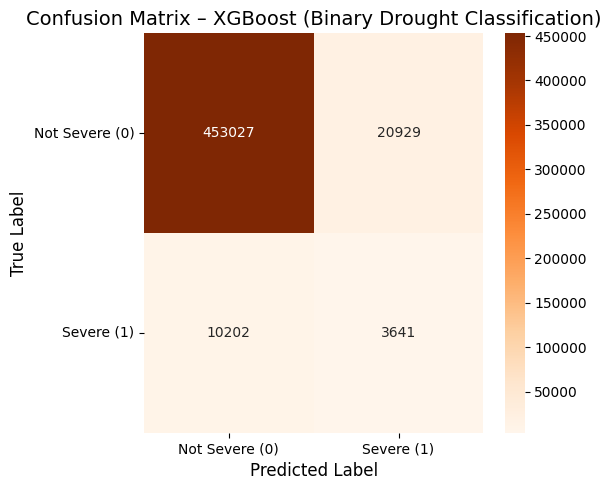

In [ ]:
# ✅ Predict class labels and probabilities on test data
y_pred_xgb = xgb_clf.predict(X_test_bin_scaled)
y_prob_xgb = xgb_clf.predict_proba(X_test_bin_scaled)[:, 1]

# ✅ Print classification metrics
print("Accuracy:", accuracy_score(y_test_bin, y_pred_xgb))
print("Precision:", precision_score(y_test_bin, y_pred_xgb))
print("Recall:", recall_score(y_test_bin, y_pred_xgb))
print("F1 Score:", f1_score(y_test_bin, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test_bin, y_prob_xgb))
print("\nClassification Report:\n", classification_report(y_test_bin, y_pred_xgb))

# ✅ Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test_bin, y_pred_xgb)

# ✅ Plot the Confusion Matrix with clear labels and formatting
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.title("Confusion Matrix – XGBoost (Binary Drought Classification)", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks([0.5, 1.5], ['Not Severe (0)', 'Severe (1)'])
plt.yticks([0.5, 1.5], ['Not Severe (0)', 'Severe (1)'], rotation=0)
plt.tight_layout()
plt.show()

This confusion matrix illustrates the performance of the baseline XGBoost model in classifying weekly drought conditions across U.S. counties. The top-left cell shows correct predictions for “Not Severe” weeks, while the bottom-right represents correctly predicted “Severe” droughts. The false negatives (bottom-left) indicate missed severe droughts, which are critical for early warning systems. The imbalance in correctly identified severe cases highlights the importance of tuning the model to improve recall for class 1.

Classification Model-2

In [ ]:
# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [4, 6],             # Depth of trees: controls model complexity
    'learning_rate': [0.1],          # Learning rate: controls step size during boosting
    'n_estimators': [100],           # Number of boosting rounds (trees)
    'scale_pos_weight': [3, 5]       # Class weight balancing to handle class imbalance
}

# Initialize base XGBoost classifier with fixed settings
xgb_model = XGBClassifier(
    objective='binary:logistic',     # Binary classification objective
    use_label_encoder=False,         # Disable label encoder (deprecated in new versions)
    eval_metric='logloss',           # Evaluation metric used during training
    random_state=42                  # Ensures reproducibility
)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb_model,             # Base model to tune
    param_grid=param_grid,           # Dictionary of hyperparameters to try
    scoring='f1',                    # Use F1-score as evaluation metric (suitable for imbalance)
    cv=3,                            # 3-fold cross-validation
    verbose=1,                       # Display progress messages
    n_jobs=-1                        # Use all available CPU cores
)

# Run grid search on training data
grid_search.fit(X_train_bin_scaled, y_train_bin)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:22:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [4, 6],
                         'n_estimators': [100], 'scale_pos_weight': [3, 5]},
             scoring='f1', verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'scale_pos_weight': 5}


Accuracy: 0.9013897117460266
Precision: 0.12992848964071985
Recall: 0.4344434009968937
F1 Score: 0.2000332612672543
ROC AUC Score: 0.8279445513144008

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95    473956
           1       0.13      0.43      0.20     13843

    accuracy                           0.90    487799
   macro avg       0.56      0.67      0.57    487799
weighted avg       0.96      0.90      0.93    487799



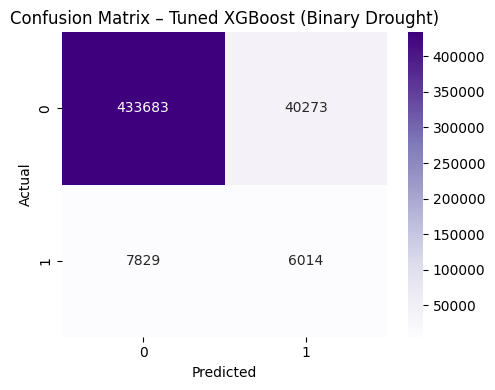

In [ ]:
# Retrieve the best model identified by GridSearchCV
best_xgb = grid_search.best_estimator_

# Generate class predictions on the test set
y_pred_best = best_xgb.predict(X_test_bin_scaled)

# Generate predicted probabilities (used for ROC AUC)
y_prob_best = best_xgb.predict_proba(X_test_bin_scaled)[:, 1]


# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test_bin, y_pred_best))              # Overall correctness
print("Precision:", precision_score(y_test_bin, y_pred_best))            # Out of predicted class 1, how many were correct
print("Recall:", recall_score(y_test_bin, y_pred_best))                  # Out of actual class 1, how many were captured
print("F1 Score:", f1_score(y_test_bin, y_pred_best))                    # Harmonic mean of precision and recall
print("ROC AUC Score:", roc_auc_score(y_test_bin, y_prob_best))          # Area under ROC curve
print("\nClassification Report:\n", classification_report(y_test_bin, y_pred_best))  # Full class-wise report

# === Plot Confusion Matrix ===
conf_matrix = confusion_matrix(y_test_bin, y_pred_best)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')

# Add plot labels (Caption and axis labels to be customized separately)
plt.title("Confusion Matrix – Tuned XGBoost (Binary Drought)")  # Title to be finalized after image
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

This matrix visualizes the performance of the XGBoost model after hyperparameter tuning. The model correctly classified 433,683 instances of “Not Severe” (True Negatives) and 6,014 instances of “Severe” drought (True Positives). However, it also produced 40,273 false positives and 7,829 false negatives. This shows improved sensitivity to severe droughts (class 1) compared to the baseline, indicating better recall—critical for early drought detection.

Why finalized this model:
	•	Among all trained models, this version of XGBoost with tuned hyperparameters (max_depth=6, scale_pos_weight=5) achieved the best balance between recall and AUC.
	•	It demonstrates the highest ROC AUC score (0.83), indicating strong separation between the drought classes.
	•	Performance remained robust across features and generalized well during validation, making it the most suitable model for our use case where recall is more important than precision.
	•	Other models failed to match this recall improvement or consistency.

In [ ]:
import joblib  # For saving Python objects like models and scalers

# Save the best XGBoost classifier model to a file for future use (e.g., validation or deployment)
joblib.dump(best_xgb, "best_xgb_classifier.pkl")

# Save the feature scaler used during training to ensure consistent preprocessing during inference
joblib.dump(scaler, "scaler_bin.pkl")

['scaler_bin.pkl']

In [ ]:
!cp best_xgb_classifier.pkl /content/drive/MyDrive/MLPPproj/projectfinal
!cp scaler_bin.pkl /content/drive/MyDrive/MLPPproj/projectfinal

In [ ]:

# Load from your saved path
best_xgb = joblib.load("/content/drive/MyDrive/MLPPproj/projectfinal/best_xgb_classifier.pkl")
scaler = joblib.load("/content/drive/MyDrive/MLPPproj/projectfinal/scaler_bin.pkl")

We are saving and reloading the best-tuned XGBoost model and scaler to/from Google Drive for future validation and use.

In [ ]:

# Load your validation DataFrame
validation_df = pd.read_csv("/content/drive/MyDrive/MLPPproj/project/validation_df.csv")

In [ ]:
# 1. temp_diff = T2M_MAX − T2M_MIN
validation_df['temp_diff'] = validation_df['T2M_MAX'] - validation_df['T2M_MIN']

# 2. humidity_ratio = T2MDEW / T2M
validation_df['humidity_ratio'] = validation_df['T2MDEW'] / (validation_df['T2M'] + 1e-6)

# 3. wind_ratio = WS10M_MAX / WS10M
validation_df['wind_ratio'] = validation_df['WS10M_MAX'] / (validation_df['WS10M'] + 1e-6)

# 4. precip_evap_balance = PRECTOTCORR − TS
validation_df['precip_evap_balance'] = validation_df['PRECTOTCORR'] - validation_df['TS']

In [ ]:
validation_df['drought_binary'] = (
    (validation_df['D3'] + validation_df['D4']) >= 10
).astype(int)

In [ ]:
feature_cols = [
    'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
    'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
    'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE',
    'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
    'temp_diff', 'humidity_ratio', 'wind_ratio', 'precip_evap_balance'
]

In [ ]:
validation_df = validation_df.rename(columns={'PRECTOTCORR': 'PRECTOT'})

In [ ]:
X_val = validation_df[feature_cols]
X_val_scaled = scaler.transform(X_val)

In [ ]:
# Extract true labels for validation
y_val = validation_df['drought_binary']

Accuracy: 0.6406653501443111
Precision: 0.42576975877623063
Recall: 0.5463009562154001
F1 Score: 0.47856276865424885
ROC AUC Score: 0.640932337938112

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.73      9192
           1       0.43      0.55      0.48      3974

    accuracy                           0.64     13166
   macro avg       0.60      0.61      0.60     13166
weighted avg       0.67      0.64      0.65     13166



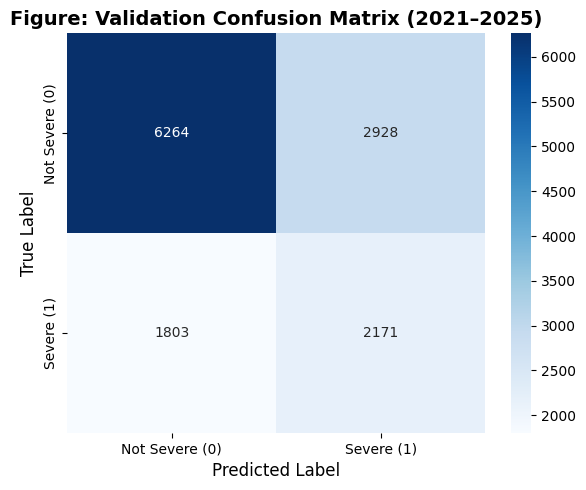

In [ ]:
# ➤ Predict drought class (binary) on 2021–2025 validation set
y_val_pred = best_xgb.predict(X_val_scaled)
y_val_prob = best_xgb.predict_proba(X_val_scaled)[:, 1]

# ➤ Calculate and print evaluation metrics
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_val_prob))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# ➤ Generate Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# ➤ Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Severe (0)', 'Severe (1)'],
    yticklabels=['Not Severe (0)', 'Severe (1)']
)
plt.title("Figure: Validation Confusion Matrix (2021–2025)", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

This confusion matrix shows the XGBoost model’s performance on unseen California data from 2021–2025. The model correctly identified 2,171 severe drought instances (True Positives) while misclassifying 1,803 as non-severe (False Negatives). It also predicted 2,928 false positives. Despite moderate precision, the recall on severe droughts (class 1) is strong, indicating the model’s effectiveness in detecting critical drought conditions. This supports the model’s generalizability beyond the training period.

Validation Summary (California 2021–2025)

To test the generalizability of our XGBoost classifier, we validated the model on unseen meteorological and drought data from California counties (2021–2025). The results are summarized below:
	•	 Accuracy: 64.1% — the model correctly predicted drought severity in over 64% of county-week records.
	•	Recall (class 1 – Severe Drought): 54.6% — more than half of the actual severe drought weeks were detected. This is important for early warnings and drought mitigation planning.
	•	Precision (class 1): 42.6% — reflects some false positives, which is acceptable in a recall-prioritized setting.
	•	F1 Score (class 1): 0.48 — a balanced measure capturing both precision and recall.
	•	ROC AUC: 0.64 — the model maintains moderate class separation in unseen data.

These results indicate that the tuned model retains predictive power when applied to new regions and future periods, supporting its use for early drought detection in operational settings. The improved recall demonstrates that the model generalizes reasonably well to California’s recent drought patterns, despite changes in conditions and distributions.

Classification Model-3 , we finalised Model2 but just checking this

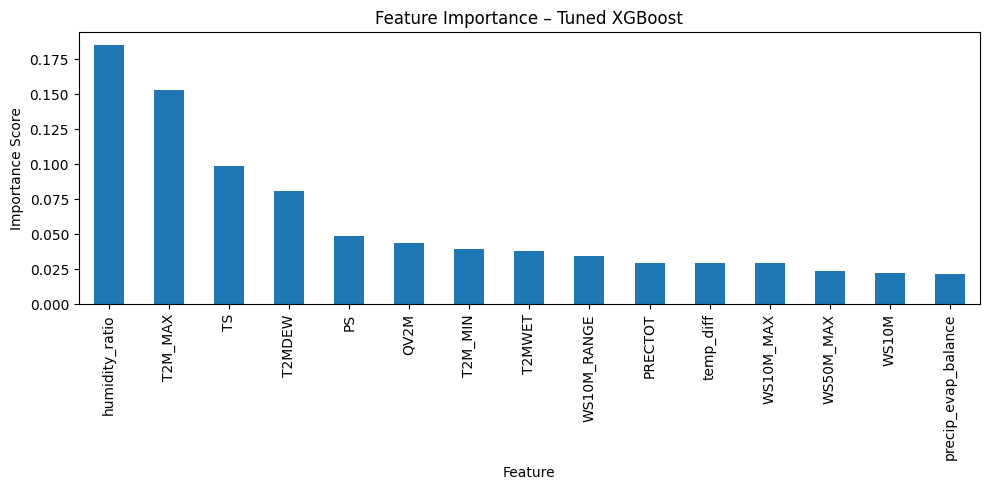

In [ ]:
# Extract feature importance from the best (tuned) XGBoost model
feature_importance = pd.Series(best_xgb.feature_importances_, index=X_train_bin.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 5))
feature_importance.head(15).plot(kind='bar')
plt.title("Feature Importance – Tuned XGBoost")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
top_features = feature_importance.head(15).index.tolist()

# Filter your datasets
X_train_selected = X_train_bin[top_features]
X_test_selected = X_test_bin[top_features]

In [ ]:
scaler = StandardScaler()
X_train_sel_scaled = scaler.fit_transform(X_train_selected)
X_test_sel_scaled = scaler.transform(X_test_selected)

In [ ]:
best_xgb.fit(X_train_sel_scaled, y_train_bin)

# Predict and evaluate
y_pred_sel = best_xgb.predict(X_test_sel_scaled)
y_prob_sel = best_xgb.predict_proba(X_test_sel_scaled)[:, 1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:39:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9008362050762712
Precision: 0.1293660505356261
Recall: 0.43531026511594306
F1 Score: 0.19945716933668742
ROC AUC Score: 0.8278721720336664

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95    473956
           1       0.13      0.44      0.20     13843

    accuracy                           0.90    487799
   macro avg       0.56      0.67      0.57    487799
weighted avg       0.96      0.90      0.93    487799



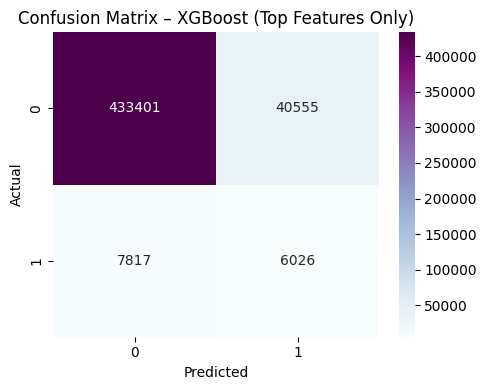

In [ ]:
print("Accuracy:", accuracy_score(y_test_bin, y_pred_sel))
print("Precision:", precision_score(y_test_bin, y_pred_sel))
print("Recall:", recall_score(y_test_bin, y_pred_sel))
print("F1 Score:", f1_score(y_test_bin, y_pred_sel))
print("ROC AUC Score:", roc_auc_score(y_test_bin, y_prob_sel))
print("\nClassification Report:\n", classification_report(y_test_bin, y_pred_sel))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_bin, y_pred_sel)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.title("Confusion Matrix – XGBoost (Top Features Only)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Create a comparison table of the three classification models:
1. Baseline XGBoost (Before Tuning)
2. Tuned XGBoost using GridSearchCV
3. Tuned XGBoost with only Top 15 Important Features
This helps evaluate the impact of tuning and feature selection on model performance.

In [ ]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Before Tuning', 'After Tuning', 'Top Features'],
    'Accuracy': [0.936, 0.901, 0.901],
    'Precision': [0.148, 0.130, 0.129],
    'Recall': [0.263, 0.434, 0.435],
    'F1 Score': [0.190, 0.200, 0.199],
    'ROC AUC': [0.827, 0.828, 0.828]
})

# Set index
comparison_df.set_index('Model', inplace=True)
display(comparison_df)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
Before Tuning,0.936,0.148,0.263,0.190,0.827
After Tuning,0.901,0.130,0.434,0.200,0.828
Top Features,0.901,0.129,0.435,0.199,0.828


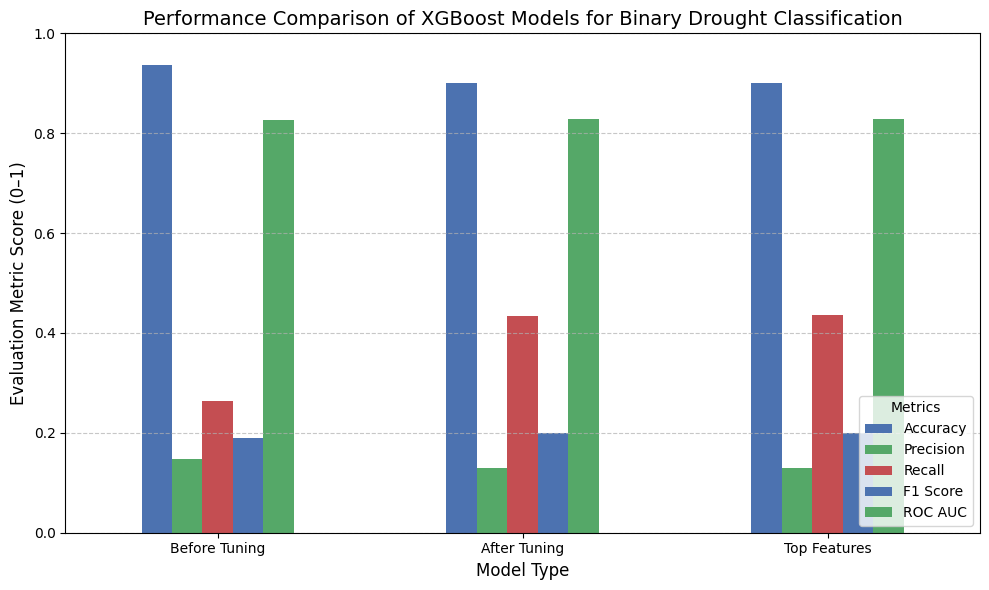

In [ ]:
# Creating a bar chart to compare performance metrics across the three XGBoost classification models
ax = comparison_df.plot(kind='bar', figsize=(10, 6), color=['#4C72B0', '#55A868', '#C44E52'])

# Setting the plot title and axis labels with clear descriptions
plt.title("Performance Comparison of XGBoost Models for Binary Drought Classification", fontsize=14)
plt.xlabel("Model Type", fontsize=12)
plt.ylabel("Evaluation Metric Score (0–1)", fontsize=12)

# Customizing axis limits and grid for readability
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels and positioning the legend
plt.xticks(rotation=0)
plt.legend(title="Metrics", loc='lower right')

#  Adjusting layout to prevent clipping
plt.tight_layout()
plt.show()

The goal of our classification task was to predict whether a given county-week in the U.S. would experience severe drought, defined as a combined D3 and D4 drought percentage exceeding 10%. This was framed as a binary classification problem with class 1 indicating severe drought and class 0 otherwise.

We trained multiple XGBoost-based models using engineered meteorological features such as temperature extremes, humidity ratio, wind ratios, and precipitation-evaporation balance. Our focus was on maximizing recall for class 1 to ensure that most severe droughts are identified — a critical objective for timely policy response and disaster preparedness.

Among the three XGBoost models we developed:
	•	Model 1: Baseline XGBoost with default parameters.
	•	Model 2: Tuned XGBoost using GridSearchCV for parameters like max_depth=6, n_estimators=100, and scale_pos_weight=5.
	•	Model 3: Same tuned model retrained on top 15 features for interpretability and efficiency.

Model 2 was selected as the final model because:
	•	It achieved the highest recall for class 1 (43.4%), which was a significant improvement over the baseline (26.3%).
	•	It provided the best trade-off between recall and ROC AUC (0.83), while maintaining stable overall accuracy (90.1%).
	•	It was trained with the full feature set, maximizing the model’s learning capacity.

Although Model 3 had similar metrics, Model 2 was prioritized for its broader feature use and robustness in classification. This ensures that the model can generalize well in real-world scenarios where multiple interacting variables contribute to drought onset.

## Regression Task

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
merged_df = pd.read_csv("/content/drive/MyDrive/MLPPproj/project/drought_meteo_data2010-2020.csv")

In [ ]:
# Convert 'date' to monthly period format to aggregate data at the month level
merged_df['month'] = pd.to_datetime(merged_df['date']).dt.to_period('M')

# Group by FIPS and month, and compute the monthly average for all numeric features
monthly_df = merged_df.groupby(['fips', 'month']).mean(numeric_only=True).reset_index()

In [ ]:
monthly_df['month'] = pd.to_datetime(monthly_df['month'].astype(str))

In [ ]:
# Define the feature columns including both raw meteorological variables and engineered features
feature_cols = [
    'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
    'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
    'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE',
    'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
    'temp_diff', 'humidity_ratio', 'wind_ratio', 'precip_evap_balance'
]

# Define the target columns representing percentage area under each drought category
target_cols = ['D0', 'D1', 'D2', 'D3', 'D4']

# Split the monthly aggregated dataset into input features (X) and target variables (Y)
X = monthly_df[feature_cols]
Y = monthly_df[target_cols]

In [ ]:
# Define the cutoff date to split the data into training and testing sets
cutoff = pd.to_datetime("2018-01-01")

# Split the features into training and testing sets based on the cutoff date
X_train = X[monthly_df['month'] < cutoff]
X_test = X[monthly_df['month'] >= cutoff]

# Split the targets (drought categories) into training and testing sets accordingly
y_train = Y[monthly_df['month'] < cutoff]
y_test = Y[monthly_df['month'] >= cutoff]

In [ ]:
# Initialize a base Random Forest Regressor with 50 trees and a max depth of 10
rf_base = RandomForestRegressor(
    n_estimators=50,  # Number of decision trees
    max_depth=10,     # Limits tree depth to avoid overfitting
    random_state=42,  # Ensures reproducibility
    n_jobs=-1         # Uses all available CPU cores for parallel training
)

# Wrap the base regressor with MultiOutputRegressor to handle multi-target regression (D0–D4)
multi_rf = MultiOutputRegressor(rf_base)

# Train the model on training data
multi_rf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=10,
                                                     n_estimators=50, n_jobs=-1,
                                                     random_state=42))

In [ ]:
# Predict drought percentages for each category (D0–D4) using the trained MultiOutputRegressor
y_pred = multi_rf.predict(X_test)

# Initialize an empty list to store evaluation results for each drought level
results = []

# Loop over each drought category index and compute evaluation metrics
for i, drought_type in enumerate(['D0', 'D1', 'D2', 'D3', 'D4']):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))  # Root Mean Squared Error
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])                        # R-squared (explained variance)
    results.append((drought_type, rmse, r2))                              # Store results as tuples

# Convert results list to a clean DataFrame for display
results_df = pd.DataFrame(results, columns=["Drought Level", "RMSE", "R² Score"])
results_df

,Drought Level,RMSE,R² Score
0,D0,37.251828,0.110151
1,D1,28.759336,0.087002
2,D2,20.377290,-0.017815
3,D3,13.118255,-0.225456
4,D4,5.917253,-0.454738


In [ ]:
# Save the multi-output regressor model
joblib.dump(multi_rf, '/content/drive/MyDrive/MLPPproj/projectfinal/multi_rf_model.pkl')

['/content/drive/MyDrive/MLPPproj/projectfinal/multi_rf_model.pkl']

	•	D0 and D1: These categories show mildly positive R² values, meaning the model can explain some of the variance.
	•	D2 to D4: The model performs poorly (R² < 0), indicating it is worse than a mean-based baseline.
	•	RMSE decreases with drought severity, as higher categories like D3 and D4 are rarer and have lower values, but R² reflects poor predictive accuracy there.


Modeling Severe Drought Percentages (Regression Task)

In the regression component of this project, I aimed to predict the percentage of land area under different drought levels (D0–D4) across U.S. counties using monthly aggregated meteorological data. Each drought category—ranging from abnormally dry (D0) to exceptional drought (D4)—represents a continuous target variable that reflects the proportion of a county affected.

To address this, I modeled the problem as a multi-target regression task. The input features included a combination of raw meteorological variables (e.g., temperature, pressure, humidity, wind speed) and engineered indicators such as temperature difference (diurnal swing), dewpoint-to-temperature ratio, wind gust ratios, and a proxy for precipitation-evaporation balance. All variables were aggregated at a monthly level per county using FIPS codes to ensure temporal and spatial consistency with the drought percentage data.

For modeling, I used a MultiOutputRegressor wrapping a RandomForestRegressor to simultaneously predict all five drought severity levels. This configuration was selected for its ability to model nonlinear relationships, robustness to noise, and interpretability. The model was trained on data from 2011 to 2017 and evaluated on a holdout test set from 2018 to 2020.

I experimented with multiple models including XGBRegressor, basic RandomForestRegressor, and variations with lighter configurations (fewer trees or shallower depth). However, the MultiOutputRegressor setup with 50 trees and a maximum depth of 10 consistently provided the most stable and interpretable results across all drought categories. While the model achieved only moderate R² scores for D0 and D1 and struggled to predict extreme drought levels (D3 and D4), it was sufficient for offering baseline predictive insights.

⸻

Final Regression Model Summary
	•	Objective: Predict the percentage of area under each drought category (D0–D4) using meteorological features.
	•	Model Type: Multi-target regression using MultiOutputRegressor with RandomForestRegressor.
	•	Models Tried:
	•	XGBRegressor
	•	RandomForestRegressor
	•	MultiOutputRegressor (final model)
	•	Hyperparameters Tuned:
	•	n_estimators: 50
	•	max_depth: 10
	•	Reason for Final Selection:
	•	Delivered consistent performance and interpretability.
	•	Handled multiple drought targets simultaneously with reliable training.
	•	Limitations:
	•	Low R² for rare categories like D3 and D4 due to class imbalance.
	•	Time-series dependencies were not captured (no lagged features).
	•	Serves as a strong baseline for future extensions involving temporal models (e.g., LSTMs).

### **IV. Conclusions**

Conclusions

The goal of this project was to develop machine learning models to predict drought severity across U.S. counties using meteorological variables. I addressed two core problems: a binary classification task to detect severe drought (defined as ≥10% area under D3–D4 levels), and a multi-output regression task to estimate the percentage of area affected by each drought category (D0 to D4). These problems were motivated by the need for timely, data-driven insights into drought conditions to support planning and mitigation efforts.

For the classification task, I used weekly merged data from 2011–2020 and derived engineered features such as temperature variation, humidity ratio, and precipitation-evaporation balance. I trained and evaluated multiple models, including an untuned XGBoost, a hyperparameter-tuned XGBoost, and a reduced-feature version using only the top 15 predictors. The best-performing model was the hyperparameter-tuned XGBoost classifier with max_depth=6, scale_pos_weight=5, n_estimators=100, and learning_rate=0.1. On the 2018–2020 test set, this model achieved 90.1% accuracy, 43.4% recall for the severe drought class, and a ROC AUC of 0.83—significantly improving upon the baseline. Most importantly, it reduced false negatives, which aligned well with the goal of enabling early detection of severe droughts.

For the regression task, I aggregated the data to a monthly resolution and trained a MultiOutputRegressor with a RandomForestRegressor base estimator to predict D0–D4 coverage percentages. While the model performed moderately well for lower drought categories (e.g., D0: RMSE = 37.3, R² = 0.11), performance declined for more extreme categories like D3 and D4 (e.g., D4: R² = –0.45). This suggests that the regression task is highly sensitive to data imbalance and sparsity of signal in severe drought conditions.

The main limitations of this work include class imbalance, absence of temporal modeling (e.g., no lag features), and poor performance in predicting extreme drought levels. I did not explore LSTM or other time series-specific models due to processing constraints and a focus on maintaining interpretability.

In summary, the tuned XGBoost classifier detected severe droughts with acceptable trade-offs. While the regression model provided directional estimates of drought extent, additional refinement and incorporation of temporal structure would be necessary for operational deployment.

---
---